# Import Libraries

In [1]:
import pandas as pd
pd.options.display.max_rows = 500
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_colwidth = None

In [3]:
import colorcet as cc

# Generate the glasbey colormap with enough colors and skip the first 24
num_styles = 25
glasbey_colors = cc.glasbey[24:num_styles + 24]

first_galsbey_colors = cc.glasbey[:24]

# Load ChatGPT Poems

In [4]:
chatgpt_df = pd.read_csv("../data/data-in-progress/llm-generated-poetry/ChatGPT-Generated-Poetry-Corpus.csv")

In [5]:
chatgpt_df.head()

,model,prompt,prompt_type,chatgpt_poem,subject,style,num_words,num_lines,num_stanzas,date,full_date
0,gpt-3.5-turbo,Write a poem about the subject of 'love' in the following form or style: limerick.,general,"In a world where love is divine,\nThere lived a young couple so fine.\nTheir hearts, they were smitten,\nTheir lives were well written,\nIn limericks, their love did shine.\n\nA young man named Jack was quite bold,\nAnd his love for sweet Jill, we were told.\nHe climbed hills with great flair,\nTo show Jill he did care,\nTheir love story, legendary, untold.\n\nWith a pail and a heart full of glee,\nJack would run up the hill, brimmed with glee.\nFor sweet Jill, a grand quest,\nIn love, he was the best,\nBuilding limericks that filled her with glee.\n\nA dreamy-eyed chap named Joe,\nFell in love with a girl named Flo.\nHe penned limericks so sweet,\nMade her blush, made her fleet,\nTogether, in love, they did glow.\n\nYoung Molly fell hard for a guy,\nWith a twinkle, a sparkle, oh my!\nHer heart danced with delight,\nAs he wooed her each night,\nIn limericks, their love soared sky-high.\n\nLove's tale dances with wit and rhyme,\nIn limericks, a rhythm so prime.\nWith words, hearts intertwine,\nIn love's sweet, limerick line,\nFor love's essence, captured - sublime.",love,limerick,194,30,6,2024-02-02,2024-02-02 09:29:11
1,gpt-3.5-turbo,Write a poem about the subject of 'love' in the following form or style: limerick. Do not use the actual word(s) 'love' or 'limerick' in the poem.,figurative,"In distant lands, two souls would meet,\nA fire within, a love so sweet.\nWith hearts aflutter,\nThey’d dance and stutter,\nA tale of passion, complete.\n\nEyes locked, their gaze spoke volumes,\nA symphony played, like love’s costumes.\nA touch so tender,\nThey made surrender,\nEmbracing magic, love’s blossoms.\n\nWhispering secrets in moonlight's embrace,\nTwo souls entwined, lost in a chase.\nThrough life's commotion,\nA love, sweet devotion,\nTheir hearts forever intertwaced.\n\nYet fate’s cruel hand, with a twist,\nClouds formed, love's skies filled with mist.\nBut still they’d fight,\nWith all their might,\nLove's limerick forever persist.\n\nThrough valleys of sorrow, they'd tread,\nWith hands entwined, their spirits fed.\nThe laughter and sighs,\nJoy outweighed goodbyes,\nTheir love, the greatest thread.\n\nAnd so their tale, like a limerick danced,\nLove's symphony played, hearts entranced.\nThrough life’s fleeting measure,\nThey found their treasure,\nA love so divine, forever enhanced.",love,limerick,161,30,6,2024-02-02,2024-02-02 09:29:17
2,gpt-3.5-turbo,Write a poem about the subject of 'love' in the following form or style: limerick. Make the poem about something specific.,specific,"In a quaint little town by the shore,\nLived two lovers, their hearts loudly roar,\nWith sandy toes tickling,\nAnd sea breeze so thrilling,\nThey danced on the beach evermore.\n\nTheir love, like the ocean's grand waves,\nCrashing together in passionate raves,\nFrom sunrise till night,\nBoth holding on tight,\nTheir love grew in beautiful saves.\n\nWith a picnic packed full of delight,\nUnder moon's gentle silver-white light,\nThey shared playful laughter,\nAnd promises, long after,\nTo cherish each other so tight.\n\nBut as seasons began to unfold,\nTheir love, once so vibrant and bold,\nDrifted slowly apart,\nLike currents depart,\nYet memories, they always uphold.\n\nTheir love story etched in the sand,\nA reminder of love that was grand,\nThough time's tide may try,\nTrue love will not die,\nOn that shore, their footprints still stand.",love,limerick,141,25,5,2024-02-02,2024-02-02 09:29:20
3,gpt-4,Write a poem about the subject of 'love' in the following form or style: limerick.,general,"In the realm where the heart is a dove,\nAnd whispers echo the truth of love,\nStares sublime, lips like wine,\nIn laughter, joy intertwine,\nEach moment a sentiment thereof.\n \nUnderneath the velvet sky’s glove,\nWhere the moon shines pure as a dove,\nTwo 

In [6]:
len(chatgpt_df)

22772

There are some duplicates from multiple experiments. Let's drop duplicates

In [7]:
chatgpt_df = chatgpt_df.drop_duplicates(subset=['model', 'prompt_type', 'prompt', 'subject', 'style'])

In [8]:
len(chatgpt_df)

18000

# Load Human Poems

Read in CSV with all poems and forms 

In [9]:
foundation_poems = pd.read_csv("../data/final/EMNLP/final-poetry-foundation_academy-american-poets.csv")
#foundation_poems = foundation_poems.drop_duplicates(subset=['author', 'poem_title', 'poem_link'])


Read in CSV with all poems and forms, and manually cleaned poems when poems fall within 10 lines of conventional length

In [10]:
foundation_poems2 = pd.read_csv("../data/final/EMNLP/final-poetry-foundation_academy-american-poets-plus-line-lengths-CLEANED.csv")
#foundation_poems = foundation_poems.drop_duplicates(subset=['author', 'poem_title', 'poem_link'])


Combine this data

In [11]:
foundation_poems = pd.merge(foundation_poems, foundation_poems2[['author', 'poem_text', 'poem_title', 'poem_text_cleaned']], on = ['author', 'poem_title', 'poem_text'], how = 'left')
foundation_poems['poem_text_cleaned'] = foundation_poems['poem_text_cleaned'].fillna(foundation_poems['poem_text'])


In [14]:
len(foundation_poems)

3874

# Pick Styles

In [17]:
selected_styles = ['limerick',

 'ekphrasis',
 'pantoum',
 'ars poetica',
 #'visual poetry',
 #'series/sequence',
 'prose poem',
 #'epigram',
 'concrete or pattern poetry',
# 'epithalamion',
 'elegy',
 'dramatic monologue',
 'common measure',
 'blank verse',
 'free verse',
 'quatrain',
 'tercet',
 #'mixed',
#'rhymed stanza',
# 'terza rima',
 #'ottava rima',
 'couplet',
 'ghazal',
 'ballad',
 'villanelle',
 'sonnet',
 'sestina',
 'haiku',
 #'epigraph',
# 'assonance',
 #'consonance',
 'aubade',
 'pastoral',
 'ode',
 #'anaphora',
 #'symbolist',
 #'confessional',
 #'imagist',
# 'persona',
 #'aphorism',
# 'refrain',
 #'imagery',
# 'metaphor',
# 'simile',
# 'allusion',
 #'alliteration',
 'a poem']

In [18]:
len(selected_styles)

24

# Filter Data For Styles/Forms of Interest

Filter Data For Styles/Forms of Interest

In [21]:
chatgpt_df = chatgpt_df[chatgpt_df['style'].isin(selected_styles)]

In [22]:
len(chatgpt_df)

5760

In [23]:
chatgpt_df['subject'].value_counts()

subject
love                     144
nature                   144
anniversary              144
social commentaries      144
religion                 144
living                   144
relationships            144
activities               144
arts & sciences          144
mythology & folklore     144
birth                    144
toasts & celebrations    144
birthdays                144
engagement               144
farewells & good luck    144
funerals                 144
get well & recovery      144
graduation               144
gratitude & apologies    144
weddings                 144
christmas                144
cinco de mayo            144
memorial day             144
easter                   144
father's day             144
halloween                144
hanukkah                 144
independence day         144
kwanza                   144
labor day                144
mother's day             144
valentine's day          144
new year                 144
passover                 144
ramada

In [24]:
chatgpt_df['style'].value_counts()

style
limerick                      240
ekphrasis                     240
ode                           240
pastoral                      240
aubade                        240
haiku                         240
sestina                       240
sonnet                        240
villanelle                    240
ballad                        240
ghazal                        240
couplet                       240
tercet                        240
quatrain                      240
free verse                    240
blank verse                   240
common measure                240
dramatic monologue            240
elegy                         240
concrete or pattern poetry    240
prose poem                    240
ars poetica                   240
pantoum                       240
a poem                        240
Name: count, dtype: int64

In [35]:
chatgpt_df.drop_duplicates(subset=['model', 'prompt_type', 'prompt', 'subject', 'style'])['model'].value_counts()

model
gpt-3.5-turbo    2880
gpt-4            2880
Name: count, dtype: int64

In [36]:
chatgpt_df = chatgpt_df.drop_duplicates(subset=['model', 'prompt_type', 'prompt', 'subject', 'style'])

# Count Lines, Words, Stanzas

In [28]:
import re

def count_length(row):
    if isinstance(row['poem_text_cleaned'], str):

        # Count the number of stanzas
        num_stanzas = len(re.findall(r'\n\n', row['poem_text_cleaned'])) + 1
        
        # Count the number of lines by counting single new lines that are not followed by another new line
        num_lines = len(re.findall(r'(.*\S.*)(?:\n|$)', row['poem_text_cleaned']))
        
        # Count the number of words
        num_words = len(re.findall(r'\b\w+\b', row['poem_text_cleaned']))
        
        return num_stanzas, num_lines, num_words
    else:
        return None


# Apply the function
foundation_poems[['num_stanzas', 'num_lines', 'num_words']] = foundation_poems.apply(count_length, axis=1, result_type='expand')


In [29]:
chatgpt_df['poem_text'] = chatgpt_df['chatgpt_poem']

In [30]:
import re

def count_length_chatgpt(row):
    if isinstance(row['poem_text'], str):
        # Count the number of stanzas
        num_stanzas = len(re.findall(r'\n\n', row['poem_text'])) + 1
        
        # Count the number of lines by counting single newlines that are not followed by another newline
        num_lines = len(re.findall(r'(.*\S.*)(?:\n|$)', row['poem_text']))
        
        # Count the number of words
        num_words = len(re.findall(r'\b\w+\b', row['poem_text']))
        
        return num_stanzas, num_lines, num_words
    else:
        return None


# Apply the function to each row in the DataFrame
chatgpt_df[['num_stanzas2', 'num_lines2', 'num_words2']] = chatgpt_df.apply(count_length_chatgpt, axis=1, result_type='expand')


# Merge GPT and Human Poems

Make PF / AAP a model to make it easier to compare and plot the poems; change form to style

In [41]:
foundation_poems['model'] = 'Poetry Foundation and Academy of American Poets'

In [43]:
foundation_poems = foundation_poems.rename(columns = {'form': 'style'})

In [46]:
merged_df = pd.concat([chatgpt_df, foundation_poems])

# Rhyme Analysis

In [ ]:
# !pip install pronouncing

# Analyze Rhyme with Pronunciation.py

In [80]:
import pronouncing
import string
import re
import pandas as pd

# Extract the last word of each line in a poem, handling punctuation and dashes
def extract_last_words(poem):
    """
    Extract the last word of each line in a poem, handling punctuation
    """
    lines = poem.split('\n')
    last_words = []
    
    for line in lines:
        words = line.split()
        if words:
            # Use regex to remove punctuation except for dashes (e.g., em-dashes and hyphens)
            last_word = re.sub(r'[^\w\s\-—]', '', words[-1].lower())  # Keep dashes but remove other punctuation
            last_words.append(last_word)
    
    return last_words

# Count rhymed lines in a poem (consecutive, ABAB, ABBA, ABCB, and repeated words)
def count_rhymes(last_words):
    """
    Count the number of consecutive rhymes, ABAB, ABBA, ABCB, and repeated words in a poem
    Rhymed lines are counted only once even if they belong to multiple rhyme schemes
    """
     # Store unique rhymed line indices
    rhymed_lines = set() 

    # Check consecutive rhymes (AA, BB, CC, etc.)
    for i in range(len(last_words) - 1):
        word1, word2 = last_words[i], last_words[i + 1]
        if word1 == word2 or word1 in pronouncing.rhymes(word2):
            rhymed_lines.update([i, i + 1])  # Add the indices of rhyming lines to the set

    # Check ABAB rhyme scheme
    for i in range(len(last_words) - 3):
        word1, word2 = last_words[i], last_words[i + 2]
        word3, word4 = last_words[i + 1], last_words[i + 3]
        if (word1 == word2 or word1 in pronouncing.rhymes(word2)) and (word3 == word4 or word3 in pronouncing.rhymes(word4)):
            rhymed_lines.update([i, i + 1, i + 2, i + 3])

    # Check ABBA rhyme scheme
    for i in range(len(last_words) - 3):
        word1, word4 = last_words[i], last_words[i + 3]
        word2, word3 = last_words[i + 1], last_words[i + 2]
        if (word1 == word4 or word1 in pronouncing.rhymes(word4)) and (word2 == word3 or word2 in pronouncing.rhymes(word3)):
            rhymed_lines.update([i, i + 1, i + 2, i + 3])

    # Check ABCB rhyme scheme
    for i in range(len(last_words) - 3):
        word2, word4 = last_words[i + 1], last_words[i + 3]
        if word2 == word4 or word2 in pronouncing.rhymes(word4):
            rhymed_lines.update([i + 1, i + 3])

    return len(rhymed_lines)

# Apply the functions to your DataFrame
merged_df['last_words'] = merged_df['poem_text'].apply(extract_last_words)
merged_df['rhymed_lines'] = merged_df['last_words'].apply(count_rhymes)

# Calculate percentage of rhymed lines per poem
merged_df['total_lines'] = merged_df['last_words'].apply(len)
merged_df['percent_rhymed_lines'] = (merged_df['rhymed_lines'] / merged_df['total_lines']) * 100

# Check if a poem contains any rhyme (True/False)
merged_df['contains_rhyme'] = merged_df['rhymed_lines'] > 0

# Group by model and calculate the total number of poems, the number of poems with rhymes, and average percentage of rhymed lines
rhyme_summary = merged_df.groupby('model').agg(
    total_poems=('poem_text', 'size'),
    poems_with_rhyme=('contains_rhyme', 'sum'),
    avg_percent_rhymed_lines=('percent_rhymed_lines', 'mean')
).reset_index()

# Calculate the percentage of poems that contain rhymes
rhyme_summary['percent_with_rhyme'] = (rhyme_summary['poems_with_rhyme'] / rhyme_summary['total_poems']) * 100

# Display the rhyme summary table
rhyme_summary

,model,total_poems,poems_with_rhyme,avg_percent_rhymed_lines,percent_with_rhyme
0,Poetry Foundation and Academy of American Poets,3874,2518,29.447880,64.997419
1,gpt-3.5-turbo,2880,2599,63.867912,90.243056
2,gpt-4,2880,2578,65.199905,89.513889


In [82]:
rhyme_summary = merged_df.groupby(['model', 'style']).agg(
    total_poems=('poem_text', 'size'),
    poems_with_rhyme=('contains_rhyme', 'sum'),
    avg_percent_rhymed_lines=('percent_rhymed_lines', 'mean')
).reset_index()

# Calculate the percentage of poems that contain rhymes
rhyme_summary['percent_with_rhyme'] = (rhyme_summary['poems_with_rhyme'] / rhyme_summary['total_poems']) * 100

<Figure size 2500x200 with 0 Axes>

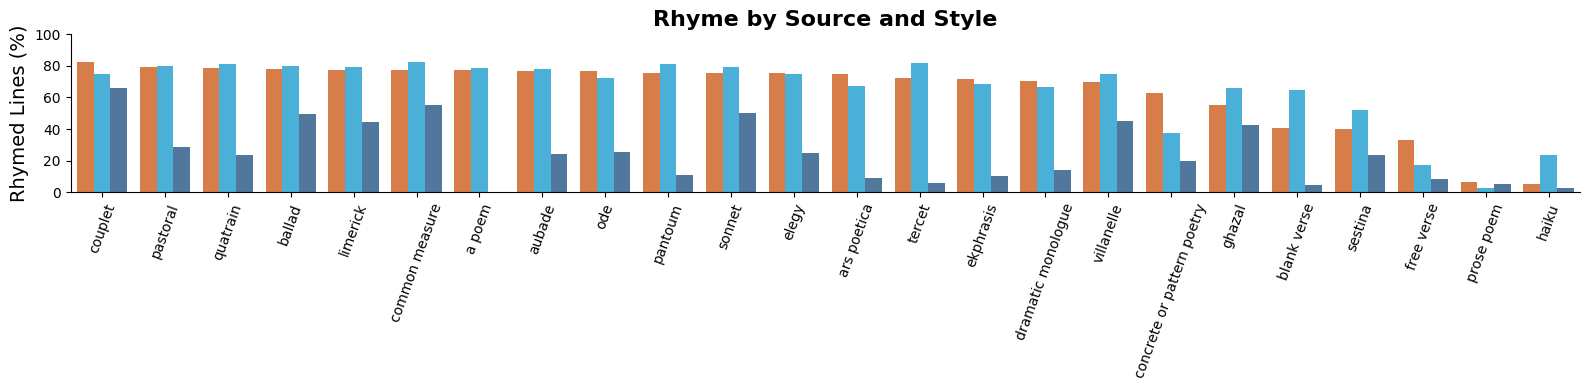

In [358]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for GPT models to sort based on rhyme percentages
gpt_rhyme_sorted = rhyme_summary[rhyme_summary['model'].isin(['gpt-3.5-turbo'])]

# Sort by rhyme percentage for GPT models
gpt_rhyme_sorted = gpt_rhyme_sorted.sort_values(by='avg_percent_rhymed_lines', ascending=False)

# Get the sorted list of styles based on GPT rhyme percentages
sorted_styles = gpt_rhyme_sorted['style'].unique()

# Reorder the rhyme_summary df
rhyme_summary_sorted = rhyme_summary.set_index('style').loc[sorted_styles].reset_index()

# Create a grouped bar plot with styles on the x-axis, grouped by model
plt.figure(figsize=(25, 2))  
g = sns.catplot(
    data=rhyme_summary_sorted, kind="bar", 
    x="style", y="avg_percent_rhymed_lines", 
    hue="model",
        hue_order=[ 'gpt-3.5-turbo','gpt-4', 'Poetry Foundation and Academy of American Poets'],
legend = False,
    height=4, aspect=4,  #
    palette=["#EE7733", "#33BBEE", "#4477AA"], 
    #legend_out=True
)

# Adjust x-axis labels for readability
g.set_xticklabels(rotation=70)

# Set titles and labels
plt.title('Rhyme by Source and Style', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('Rhymed Lines (%)', fontsize=14)
plt.ylim([0,100])

plt.tight_layout()
plt.savefig("rhyme-source-style.png", dpi=300)
plt.show()


In [86]:
rhyme_summary.sort_values(by='avg_percent_rhymed_lines', ascending = False)

,model,style,total_poems,poems_with_rhyme,avg_percent_rhymed_lines,percent_with_rhyme
52,gpt-4,common measure,120,120,82.285768,100.000000
30,gpt-3.5-turbo,couplet,120,120,82.190487,100.000000
69,gpt-4,tercet,120,120,81.700145,100.000000
63,gpt-4,pantoum,120,119,81.300595,99.166667
66,gpt-4,quatrain,120,119,81.046909,99.166667
50,gpt-4,ballad,120,120,80.101002,100.000000
64,gpt-4,pastoral,120,120,79.905781,100.000000
61,gpt-4,limerick,120,120,79.599901,100.000000
68,gpt-4,sonnet,120,120,79.519433,100.000000
40,gpt-3.5-turbo,pastoral,120,119,78.992784,99.166667


Check for accuracy

In [87]:
merged_df[['model', 'poem_text', 'last_words', 'rhymed_lines', 'total_lines', 'percent_rhymed_lines', 'contains_rhyme']].sample(25)

,model,poem_text,last_words,rhymed_lines,total_lines,percent_rhymed_lines,contains_rhyme
10677,gpt-4,"Underneath the brilliant sky, as blue as it can go,\nBegins the dance of Cinco De Mayo,\nAn echo of surrender, a story bold and bravo.\n\nParcel of the past, by lakeside, by pueblo,\nSan Jacinto's shadows whisper of the fiasco,\nCries of celebration, the strength of Mexico.\n\nThe hues of courage, green, white, and rojo,\nEmblazon the streets in vibrant tableau,\nIn honor of the battle, they've come to bestow.\n\nThe pride of Puebla, in every heart, it does glow,\nTales of valiant soldiers, their legacy does grow,\nIn every lively step, in every trumpet’s echo.\n\nFestive marigolds sway, to the rhythm they know,\nFlaming piñatas burst forth a rainbow,\nIn the dance of the brave, the Cinco De Mayo.\n\nAlong the Zócalo, where nostalgia and time flow,\nThe spirits of the past, in every shadow,\nDance again, in the heart of the bold pueblo.\n\nTriumph tasted sweet, beneath the sun's gentle throw,\nOn fifth day of May, history was made so,\nIn the dance of Cinco De Mayo, these memories borrow.\n\nSalud to the past, to the victory we owe,\nTo the brave men of Puebla, their courage on show,\nIn the dance of time, in the echoes of Cinco De Mayo.","[go, mayo, bravo, pueblo, fiasco, mexico, rojo, tableau, bestow, glow, grow, echo, know, rainbow, mayo, flow, shadow, pueblo, throw, so, borrow, owe, show, mayo]",9,24,37.500000,True
10518,gpt-3.5-turbo,"In a moment suspended between two worlds,\nA bond declared, hearts and futures twirled,\nA question asked, anxiety unfurled,\nEngagement, a promise, forever to hold.\n\nTwo souls intertwined, their love set ablaze,\nSharing dreams, together in a passionate craze,\nCommitment sealed, a vow in love's maze,\nEngagement, a journey filled with endless praise.\n\nRings exchange, a symbol gleaming bright,\nPromises made, in the presence of moonlight,\nThrough joy and tears, together they'll fight,\nEngagement, a bond that transcends all spite.\n\nWith every step, their love deeply grows,\nHand in hand, through life's winding throes,\nChoosing one another, as love bestows,\nEngagement, a love story that eternally glows.\n\nThrough lifetimes woven, their destiny unfurls,\nBound by a vow, as they face life's swirls,\nTogether in love, through this magnificent twirl,\nEngagement, a union that forever swirls.","[worlds, twirled, unfurled, hold, ablaze, craze, maze, praise, bright, moonlight, fight, spite, grows, throes, bestows, glows, unfurls, swirls, twirl, swirls]",15,20,75.000000,True
2270,gpt-3.5-turbo,"A symphony of pastel hues ablaze,\nBouquet of secrets hidden in bouquet,\nUpon this day, love's ardor we portray,\nYet, deep within our souls, a longing stays.\n\nA masterpiece of sentiment displayed,\nUpon the canvas, Cupid's stanzas played,\nEternity we seek, a love's charade,\nForever captured, love's portrait unswayed.\n\nIn frames of expectation, hearts embrace,\nBound by desire, hearts entwined with grace,\nEnveloped in a world, time can't erase,\nLove's masterpiece, the smile upon your face.\n\nBut like a canvas, love's rapture unveiled,\nA flicker of uncertainty impaled,\nFor art is but a fleeting love detailed,\nIts permanence by fleeting passions veiled.\n\nYet still, my heart soars with the hope of art,\nThat love will never fade or fall apart,\nAmidst the shadows, Cupid's fiery dart,\nA masterpiece of love, my beating heart.\n\nSo, on this day of hearts and tender sighs,\nLet me paint love's portrait with tearful eyes,\nWith each stroke, let our adoration rise,\nA masterpiece of love beneath the skies.\n\nAnd as the hues of passion intertwine,\nEkphrasis whispers softly through my mind,\nIn every brushstroke, love's tendrils entwined,\nA masterpiece of love, forever twinned.","[ablaze, bouquet, portray, stays, displayed, played, charade, unswayed, embrace, grace, erase, face, unveiled, impaled, detailed, veiled, art, apart, dart, heart, sighs, eyes, rise, skies, intertwine, mind, entwine

# Length and Style

[Text(0, 0, 'GPT-3.5'),
 Text(1, 0, 'GPT-4'),
 Text(2, 0, 'Poetry Foundation & \nAcademy of American Poets')]

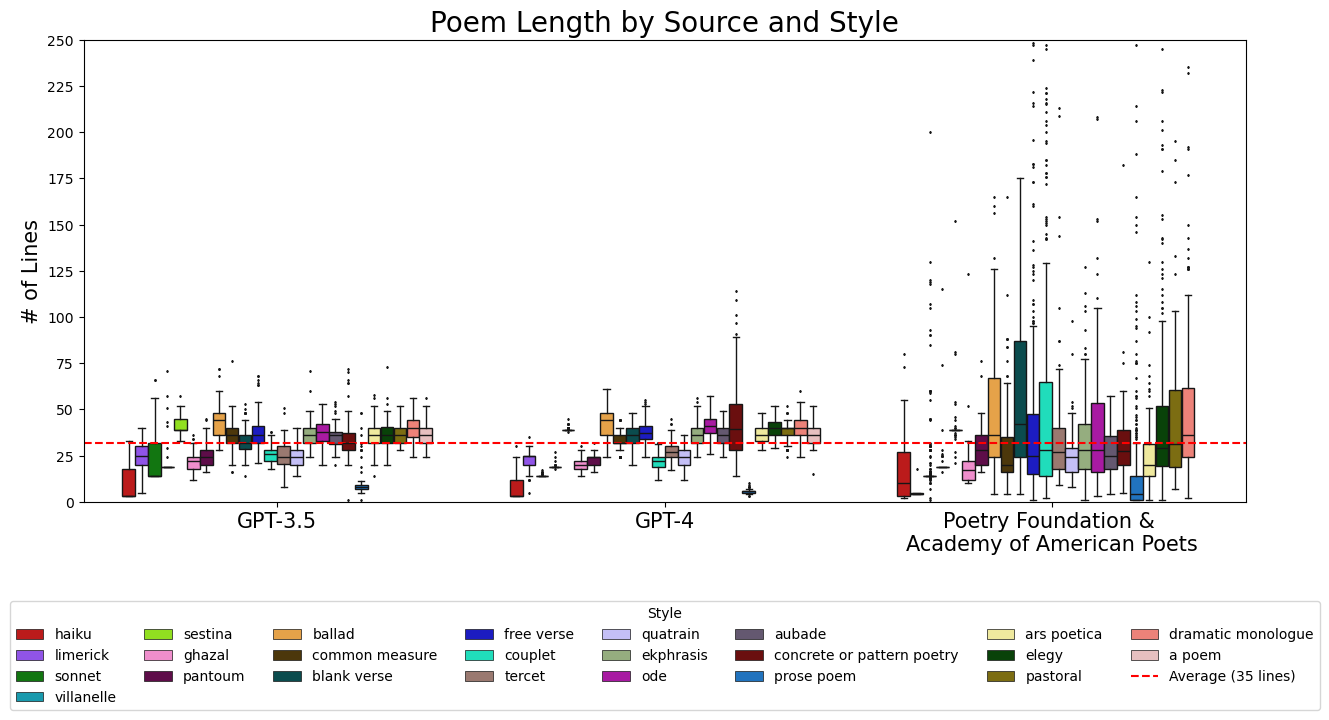

In [ ]:
plt.figure(figsize=(15, 6))

# Creating a box plot to show the distribution of num_lines for each model, colored by style
box_plot = sns.boxplot(data=merged_df, x='model', y='num_lines', hue='style', 
                       hue_order = ordered_forms, 
                       palette = first_galsbey_colors,
                       fliersize = 1, linewidth = 1)
#plt.axhline(y=36, color='red', linestyle='--', label=f'Average (35 lines)')
plt.title('Poem Length by Source and Style', fontsize = 20)
plt.axhline(y=32, color='red', linestyle='--', label=f'Average (35 lines)')

plt.xlabel(' ')
plt.ylabel('# of Lines', fontsize = 15)
# plt.legend(title='Style')
plt.legend().set_visible(False)  # Turning off the legend
plt.ylim(0, 250) 

plt.yticks(list(range(0, 275, 25)), fontsize = 10) 


# Customizing the legend
handles, labels = box_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Style', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=8)  # Adjust ncol as needed

box_plot.set_xticklabels(['GPT-3.5', 'GPT-4', 'Poetry Foundation & \nAcademy of American Poets'], rotation=0, fontsize = 15)


#plt.savefig('box-plot-avg-line-length-style-models-and-human-24-STYLES-galsbey.png', dpi=300,   bbox_inches='tight')


# Pronoun Analysis

In [90]:
pronoun_dict = {
    'First Singular': ['i', 'me', 'my', 'mine', 'myself'],
    'First Plural': ['we', 'us', 'our', 'ours', 'ourselves'],
    'Second': ['you', 'your', 'yours', 'yourself', 'yourselves', 'thou', 'thee', 'thy', 'thine', 'thyself'],
    'Third Feminine': ['she', 'her', 'hers', 'herself'],
    'Third Masculine': ['he', 'his', 'him', 'himself'],
    'Third': ['they', 'them', 'their', 'theirs', 'themself', 'themselves', 'it', 'its', 'itself']
}

In [91]:

# Refined function to count pronouns by category
def preprocess_text(text):
    # Replace newlines and punctuations with spaces
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub(r'[^\w\s]', ' ', text)  # Replace punctuation with space
    return text

def count_pronouns(text):
    if not isinstance(text, str):
        return {category: 0 for category in pronoun_dict}
    
    text = preprocess_text(text)  # Preprocess the text
    counts = {category: 0 for category in pronoun_dict}
    words = re.findall(r'\b\w+\b', text.lower())
    
    total_pronoun_count = 0
    
    for category, pronouns in pronoun_dict.items():
        counts[category] = sum(words.count(pronoun) for pronoun in pronouns)
        total_pronoun_count += counts[category]
    
    # Add a category for no pronouns
    counts['no_pronouns'] = 1 if total_pronoun_count == 0 else 0
    
    return counts

# # Count pronouns in each poem

merged_df['pronoun_counts'] = merged_df['poem_text'].apply(count_pronouns)

In [92]:
count_pronouns("Hi my name is Mel. i am. thy they are here\n we mark ")

{'First Singular': 2,
 'First Plural': 1,
 'Second': 1,
 'Third Feminine': 0,
 'Third Masculine': 0,
 'Third': 1,
 'no_pronouns': 0}

In [93]:
# Normalize the 'pronoun_counts' column into separate columns
pronoun_counts_df = pd.json_normalize(merged_df['pronoun_counts'])

# Reset index to avoid reindexing issues
merged_df.reset_index(drop=True, inplace=True)
pronoun_counts_df.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames without dropping 'pronoun_counts'
merged_df = pd.concat([merged_df, pronoun_counts_df], axis=1)

Check for accuracy

In [94]:
merged_df[['poem_text', 'pronoun_counts', 'First Plural', 'Second', 'Third']].sample(5)

,poem_text,pronoun_counts,First Plural,Second,Third
1674,"In solemn whispers of the closing year,\nThe heart now turns to Yom Kippur’s bequest.\nA hallowed day, forgiveness drawing near,\nAs sun retreats and shadows manifest.\n\nElegy for transgressions yet untold,\nWhen deeds lay bare, beneath the gaze of God.\nA sacred plea, a chance to now behold,\nOur frailty, held humbly 'neath His nod.\n\nOh, solemn day, when sins are set ablaze,\nAnd crimson stains are cleansed by sacred tears.\nThe cries of anguish blend with heartfelt praise,\nA symphony of repentance softly sears.\n\nThe Book of Life unsealed, our hearts laid bare,\nEach mortal soul stands judged with trembling fear.\nAnd yet, in purging darkness, light we share,\nRenewal beckons, offering mercy near.\n\nThrough mournful whispers and bittersweet cries,\nThe call for atonement pierces the air.\nEach soul, a vessel now stripped of its guise,\nYearning for redemption, lays its burdens bare.\n\nIn search of solace, longing to find peace,\nWe bow our heads, in quiet introspection.\nContemplating faults that caused the soul's release,\nWe seek forgiveness and divine direction.\n\nYet in the silence, hope begins to bloom,\nAs prayers ascend, a promised grace draws near.\nFrom depths of anguish, seeds of faith will bloom,\nAnd grace will soothe each whispered, heartfelt fear.\n\nOh, Yom Kippur, a sacred day of grace,\nWhen broken hearts may find their place of healing.\nElegy for past transgressions, we embrace,\nAs hope renews with every prayer repeating.\n\nSo let us pour our souls upon this page,\nIn elegy we seek to be made whole.\nWith each lament and tear, we disengage,\nFrom shadows past, into a brighter soul.\n\nIn this elegy, a chance for resurrection,\nEach sorrowed verse, a pathway to renew.\nInscribed upon our hearts, divine inscription,\nA tapestry of love, our sins pursued.\n\nMay mercy's hand restore what's been undone,\nAs Yom Kippur shines, a beacon pure and bright.\nElegy's balm, new beginnings have begun,\nForgiveness found, as darkness turns to light.","{'First Singular': 0, 'First Plural': 13, 'Second': 0, 'Third Feminine': 0, 'Third Masculine': 1, 'Third': 3, 'no_pronouns': 0}",13,0,3
1578,"In somber verse let the lament be sung,\nOf social tide that ebbs and flows unchecked.\nA poignant tale of happenings unsung,\nWhere truth is silenced, further unchecked.\n\nOh, frail humanity, a woeful plight,\nEngulfed in chains of ignorance and greed.\nWith wayward souls abandon righteous fight,\nSurrender to a world of thoughtless speed.\n\nBehold the murmurs in the city square,\nAs empty echoes fill the vacant air.\nWith words unspoken, failing to declare,\nThe burning truths for all to hear and bear.\n\nThe poet's ink, an instrument so pure,\nYet dulled by clamor of the material,\nDiverted from its purpose, to endure,\nA vanity so shallow and ethereal.\n\nElegies of yesteryear remain,\nFor earnest words to pierce the veil of night,\nTo raise the voices from the crowd’s refrain,\nAnd break the chains that bind us in their sight.\n\nBut where are they, the champions of thought,\nThe ones who use their pens to challenge fate?\nThe poets brave, by fiery passion taught,\nReveal the truths, the darkness cannot sate.\n\nYet even they, by echoes of despair,\nIn silence hide, their voices dulled by fear.\nFor what is left for those who dare to care,\nWhen apathy engulfs, and hope is near?\n\nOh, let them rise, these poets unconfined,\nThe chroniclers of all that's gone astray.\nIn verses true, let them seek and find,\nThe means to guide us on a better way.\n\nThis elegy, a plea for social change,\nLet it resound through all the land and sea.\nMay poets' words ignite a vibrant range,\nOf commentaries that set our spirits free.","{'First Singular': 0, 'First Plural': 3, 'Second': 0, 'Third Feminine': 0, 'Third Masculine': 0, 'Third': 9, 'no_pronouns': 0}",3,0,9
7473,"The star dissolved in evening—the one star\nThe silently\n and night O soon now, soon\nAnd still the light

## Calculate Total Words

Calculate total words for each poem

In [97]:
merged_df['Total Words'] = merged_df['poem_text'].apply(lambda x: len(str(x).split()))


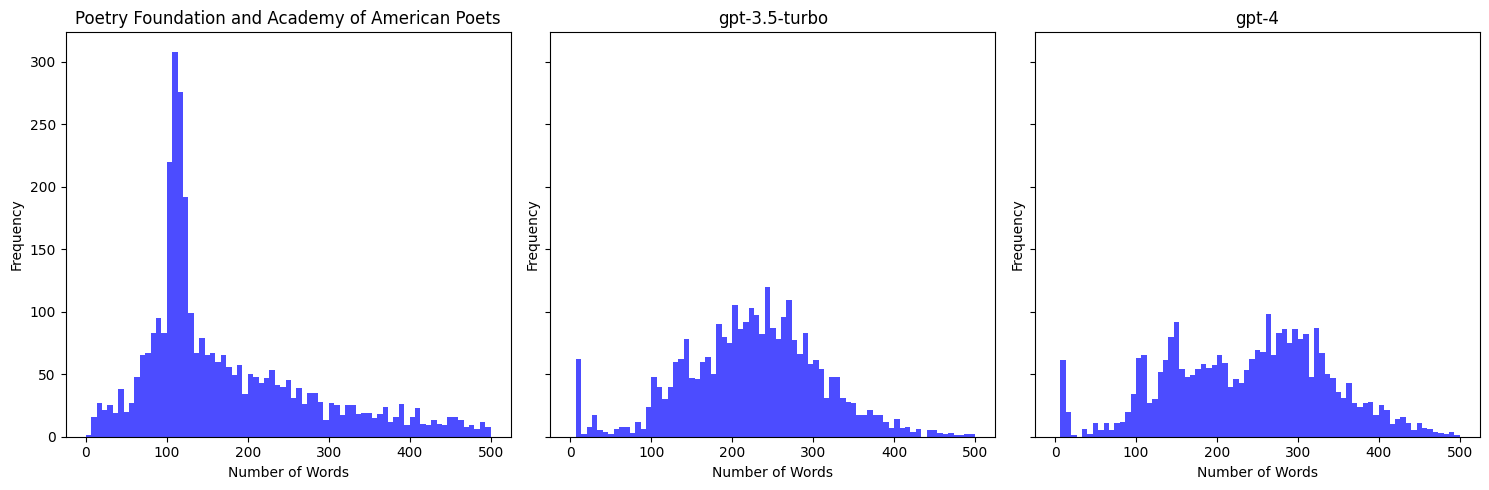

In [98]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # 1 row, 3 columns

# Plot histograms for each model
models = ['Poetry Foundation and Academy of American Poets', 'gpt-3.5-turbo', 'gpt-4']

for i, model in enumerate(models):
    axs[i].hist(merged_df[merged_df['model'] == model]['Total Words'], bins=75, range=[0, 500], color='blue', alpha=0.7)
    axs[i].set_title(model)
    axs[i].set_xlabel('Number of Words')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [104]:
ordered_forms = ['haiku', 'limerick', 'sonnet', 'villanelle', 'sestina', 'ghazal', 'pantoum', 'ballad', 'common measure', 'blank verse', 'free verse', 'couplet', 'tercet', 'quatrain', 'ekphrasis', 'ode', 'aubade', 'concrete or pattern poetry', 'prose poem', 'ars poetica', 'elegy', 'pastoral', 'dramatic monologue', 'a poem']

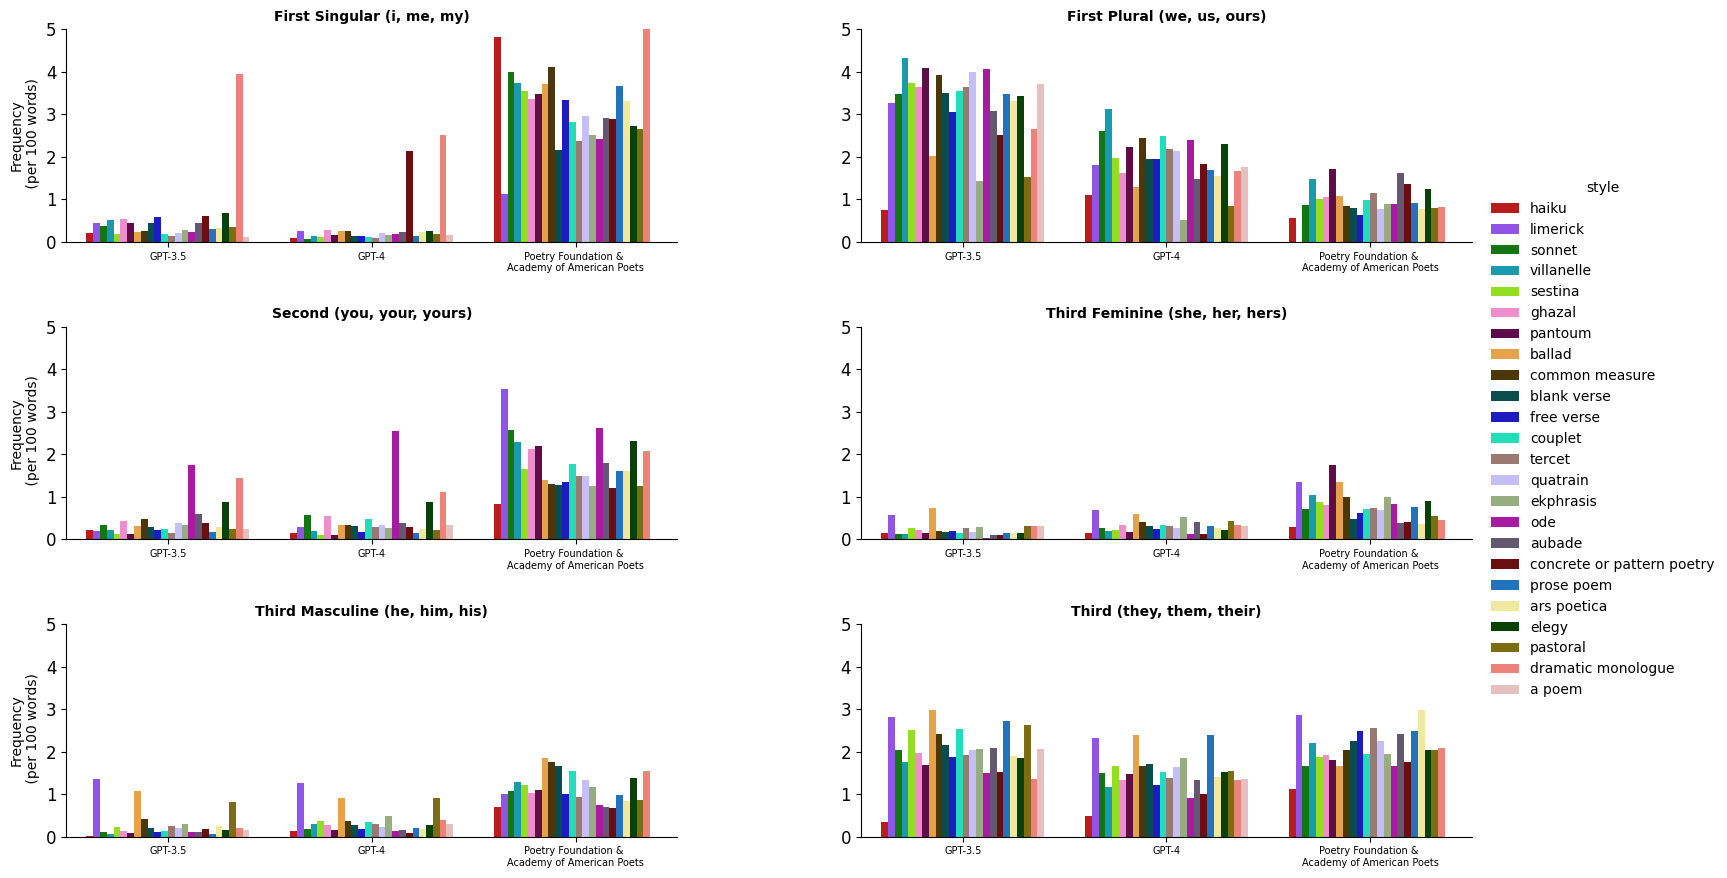

In [105]:
# Normalize pronoun counts by total words per poem
merged_df['First Singular (i, me, my)'] = (merged_df['First Singular'] / merged_df['Total Words']) * 100
merged_df['First Plural (we, us, ours)'] = (merged_df['First Plural'] / merged_df['Total Words']) * 100
merged_df['Second (you, your, yours)'] = (merged_df['Second'] / merged_df['Total Words']) * 100
merged_df['Third Feminine (she, her, hers)'] = (merged_df['Third Feminine'] / merged_df['Total Words']) * 100
merged_df['Third Masculine (he, him, his)'] = (merged_df['Third Masculine'] / merged_df['Total Words']) * 100
merged_df['Third (they, them, their)'] = (merged_df['Third'] / merged_df['Total Words']) * 100

# Melt DataFrame with normalized pronoun counts
melted_df = merged_df.melt(id_vars=['model', 'style'], 
                           value_vars=['First Singular (i, me, my)', 'First Plural (we, us, ours)', 'Second (you, your, yours)', 
                                       'Third Feminine (she, her, hers)', 'Third Masculine (he, him, his)', 'Third (they, them, their)'],
                           var_name='Pronoun Category', 
                           value_name='Normalized Count')

g = sns.catplot(
    data=melted_df, kind="bar", col="Pronoun Category",
    aspect=2.5,  # Increase aspect ratio for wider plots
    height=3,    # Increase height for better visibility
    errorbar='ci',
    hue_order=ordered_forms,
    col_wrap=2,
    x="model", y="Normalized Count", hue="style",  # Group by "style" within the same plot
    capsize=0, errwidth=0,
    palette=first_galsbey_colors,  # Use a different color palette to distinguish styles
    sharey=False,
)

# Set yticks
g.set(yticks=np.arange(0, 6, 1))

# Set titles and labels
g.set_titles("{col_name}", weight='bold', fontsize=20)

for i, ax in enumerate(g.axes.flatten()):
    ax.set_ylim([0, 5])

    ax.tick_params(labelbottom=True)
    ax.tick_params(labelsize=12)
    ax.set_xticklabels(['GPT-3.5', 'GPT-4', 'Poetry Foundation & \nAcademy of American Poets'], rotation=0, fontsize=7)
    ax.set_xlabel('')

    if i % 2 == 0:
        ax.set_ylabel('Frequency\n (per 100 words)')  # Set the y-axis label for the leftmost plot
    else:
        ax.set_ylabel('')

# Adjust the space between the rows and columns
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Show the plot
plt.show()


## Holiday vs Non-Holiday

/var/folders/06/y6vmvyfj0wg08vb3rszcfy080000gn/T/ipykernel_97512/35797910.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['First Singular (i, me, my)'] = (filtered_df['First Singular'] / filtered_df['Total Words']) * 100
/var/folders/06/y6vmvyfj0wg08vb3rszcfy080000gn/T/ipykernel_97512/35797910.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['First Plural (we, us, ours)'] = (filtered_df['First Plural'] / filtered_df['Total Words']) * 100
/var/folders/06/y6vmvyfj0wg08vb3rszcf

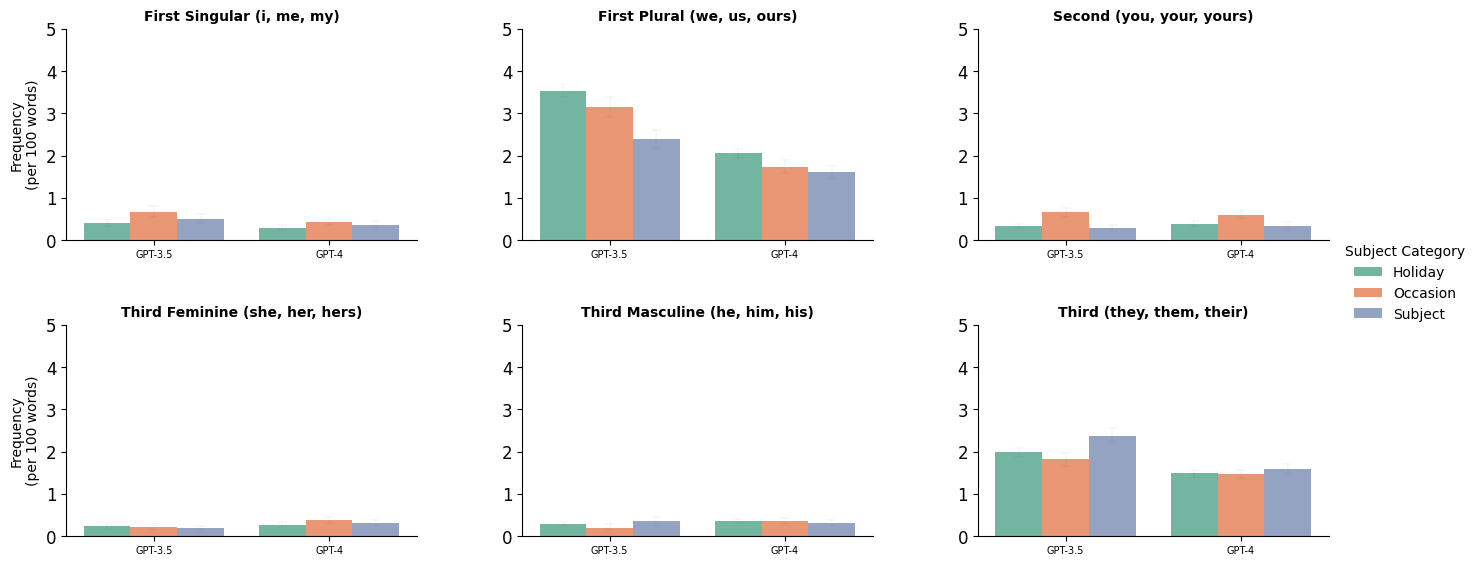

In [112]:
# Define subject categories
subjects = [
    'activities', 'arts & sciences', 'living', 'love', 'mythology & folklore', 
    'nature', 'religion', 'relationships', 'social commentaries'
]

# Define occasion-related subjects
occasions = [
    'anniversary', 'birth', 'birthdays', 'engagement', 'farewells & good luck', 
    'funerals', 'get well & recovery', 'graduation', 'gratitude & apologies', 
    'toasts & celebrations', 'weddings'
]

# Define holiday-related subjects
holidays = [
    'cinco de mayo', 'christmas', 'easter', 'father\'s day', 'halloween', 
    'hanukkah', 'independence day', 'kwanza', 'memorial day', 'mother\'s day', 
    'new year', 'passover', 'ramadan', 'rosh hashanah', 'september 11th', 
    'st. patrick\'s day', 'thanksgiving', 'valentine\'s day', 'yom kippur', 'labor day'
]

def classify_subject(subject):
    if subject in holidays:
        return 'Holiday'
    elif subject in occasions:
        return 'Occasion'
    elif subject in subjects:
        return 'Subject'
    else:
        return 'Other'

# Apply the classification function
merged_df['Subject Category'] = merged_df['subject'].apply(classify_subject)

# Filter to include only GPT-3.5-turbo and GPT-4
filtered_df = merged_df[merged_df['model'].isin(['gpt-3.5-turbo', 'gpt-4'])]

# Normalize pronoun counts by total words per poem
filtered_df['First Singular (i, me, my)'] = (filtered_df['First Singular'] / filtered_df['Total Words']) * 100
filtered_df['First Plural (we, us, ours)'] = (filtered_df['First Plural'] / filtered_df['Total Words']) * 100
filtered_df['Second (you, your, yours)'] = (filtered_df['Second'] / filtered_df['Total Words']) * 100
filtered_df['Third Feminine (she, her, hers)'] = (filtered_df['Third Feminine'] / filtered_df['Total Words']) * 100
filtered_df['Third Masculine (he, him, his)'] = (filtered_df['Third Masculine'] / filtered_df['Total Words']) * 100
filtered_df['Third (they, them, their)'] = (filtered_df['Third'] / filtered_df['Total Words']) * 100

# Melt DataFrame with normalized pronoun counts
melted_df = filtered_df.melt(id_vars=['model', 'style', 'Subject Category'], 
                             value_vars=['First Singular (i, me, my)', 'First Plural (we, us, ours)', 
                                         'Second (you, your, yours)', 'Third Feminine (she, her, hers)', 
                                         'Third Masculine (he, him, his)', 'Third (they, them, their)'],
                             var_name='Pronoun Category', 
                             value_name='Normalized Count')

# Visualize using Seaborn
g = sns.catplot(
    data=melted_df, kind="bar", col="Pronoun Category",
    aspect=1.5,  # Increase aspect ratio for wider plots
    height=3,    # Increase height for better visibility
    errorbar='ci',
    hue_order=['Holiday', 'Occasion', 'Subject'],
    col_wrap=3,
    x="model", y="Normalized Count", hue="Subject Category",  # Group by Subject Category
    capsize=.05, errwidth=.05,
    palette='Set2',  # Use a different color palette to distinguish categories
    sharey=False,
)

# Set yticks
g.set(yticks=np.arange(0, 6, 1))

# Set titles and labels
g.set_titles("{col_name}", weight='bold', fontsize=20)

for i, ax in enumerate(g.axes.flatten()):
    ax.tick_params(labelbottom=True)
    ax.tick_params(labelsize=12)
    ax.set_xticklabels(['GPT-3.5', 'GPT-4'], rotation=0, fontsize=7)
    ax.set_xlabel('')

    if i % 3 == 0:
        ax.set_ylabel('Frequency\n(per 100 words)')  # Set the y-axis label for the leftmost plot
    else:
        ax.set_ylabel('')

# Adjust the space between the rows and columns
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Show the plot
plt.show()


/var/folders/06/y6vmvyfj0wg08vb3rszcfy080000gn/T/ipykernel_97512/1005177881.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_filtered['First Singular (i, me, my)'] = (gpt_filtered['First Singular'] / gpt_filtered['Total Words']) * 100
/var/folders/06/y6vmvyfj0wg08vb3rszcfy080000gn/T/ipykernel_97512/1005177881.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_filtered['First Plural (we, us, ours)'] = (gpt_filtered['First Plural'] / gpt_filtered['Total Words']) * 100
/var/folders/06/y6vmvyfj0wg

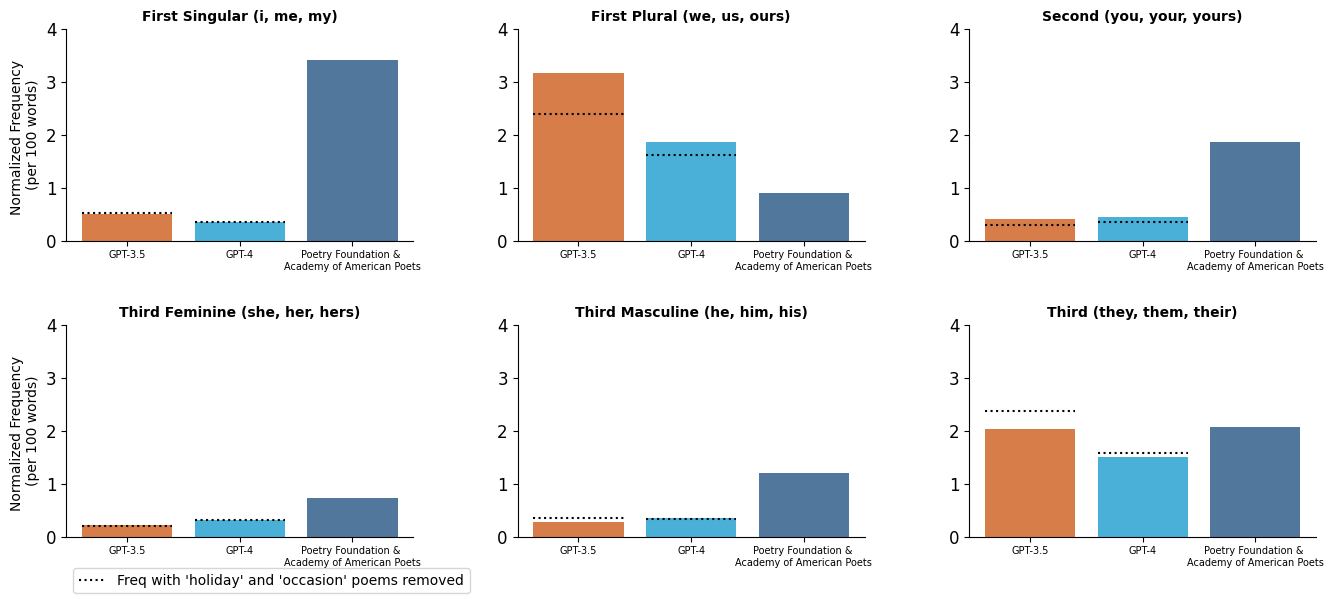

In [359]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Filter out Holiday and Occasion subjects for GPT models (for calculating means)
gpt_filtered = merged_df[
    (merged_df['model'].isin(['gpt-3.5-turbo', 'gpt-4'])) & 
    (~merged_df['Subject Category'].isin(['Holiday', 'Occasion']))
]

# Normalize pronoun counts by total words per poem
gpt_filtered['First Singular (i, me, my)'] = (gpt_filtered['First Singular'] / gpt_filtered['Total Words']) * 100
gpt_filtered['First Plural (we, us, ours)'] = (gpt_filtered['First Plural'] / gpt_filtered['Total Words']) * 100
gpt_filtered['Second (you, your, yours)'] = (gpt_filtered['Second'] / gpt_filtered['Total Words']) * 100
gpt_filtered['Third Feminine (she, her, hers)'] = (gpt_filtered['Third Feminine'] / gpt_filtered['Total Words']) * 100
gpt_filtered['Third Masculine (he, him, his)'] = (gpt_filtered['Third Masculine'] / gpt_filtered['Total Words']) * 100
gpt_filtered['Third (they, them, their)'] = (gpt_filtered['Third'] / gpt_filtered['Total Words']) * 100

# Select only the numeric columns for mean calculation
pronoun_columns = [
    'First Singular (i, me, my)', 'First Plural (we, us, ours)', 
    'Second (you, your, yours)', 'Third Feminine (she, her, hers)', 
    'Third Masculine (he, him, his)', 'Third (they, them, their)'
]

# Calculate mean pronoun counts with holidays and occasions removed
mean_excluded = gpt_filtered.groupby('model')[pronoun_columns].mean().reset_index()

# Now include all GPT poems and human poems
filtered_df = merged_df

# Normalize pronoun counts by total words per poem
filtered_df['First Singular (i, me, my)'] = (filtered_df['First Singular'] / filtered_df['Total Words']) * 100
filtered_df['First Plural (we, us, ours)'] = (filtered_df['First Plural'] / filtered_df['Total Words']) * 100
filtered_df['Second (you, your, yours)'] = (filtered_df['Second'] / filtered_df['Total Words']) * 100
filtered_df['Third Feminine (she, her, hers)'] = (filtered_df['Third Feminine'] / filtered_df['Total Words']) * 100
filtered_df['Third Masculine (he, him, his)'] = (filtered_df['Third Masculine'] / filtered_df['Total Words']) * 100
filtered_df['Third (they, them, their)'] = (filtered_df['Third'] / filtered_df['Total Words']) * 100

# Melt DataFrame with normalized pronoun counts
melted_df = filtered_df.melt(id_vars=['model'], 
                             value_vars=pronoun_columns,
                             var_name='Pronoun Category', 
                             value_name='Normalized Count')

# Plot using Seaborn with your custom color scheme
g = sns.catplot(
    data=melted_df, kind="bar", col="Pronoun Category",
    aspect=1.6, height=3, errorbar='ci', col_wrap=3,
    x="model", y="Normalized Count", 
    capsize=0, errwidth=0,
    palette=sns.color_palette(["#EE7733", "#33BBEE", "#4477AA"]), 
    sharey=False,
)

# Set yticks
g.set(yticks=np.arange(0, 5, 1))

# Set titles and labels
g.set_titles("{col_name}", weight='bold', fontsize=20)

# Overlay dotted lines for the mean of the excluded poems
for ax, pronoun_category in zip(g.axes.flatten(), pronoun_columns):

    # Get the mean values for GPT-3.5 and GPT-4 excluding Holiday and Occasion
    gpt3_mean = mean_excluded.loc[mean_excluded['model'] == 'gpt-3.5-turbo', pronoun_category].values[0]
    gpt4_mean = mean_excluded.loc[mean_excluded['model'] == 'gpt-4', pronoun_category].values[0]

    # Get the bar positions
    positions = ax.patches  

    # Draw dotted lines only spanning the bars
    ax.hlines(gpt3_mean, positions[0].get_x(), positions[0].get_x() + positions[0].get_width(), 
              color='black', linestyle='dotted', linewidth=1.5)
    
    ax.hlines(gpt4_mean, positions[1].get_x(), positions[1].get_x() + positions[1].get_width(), 
              color='black', linestyle='dotted', linewidth=1.5)

    # Set x-axis labels
    ax.set_xticklabels(['GPT-3.5', 'GPT-4', 'Poetry Foundation\n& Academy of American Poets'], rotation=0, fontsize=10)

    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel('')

for i, ax in enumerate(g.axes.flatten()):
    style = ax.get_title()
    ax.set_ylim([0, 4])  
    ax.tick_params(labelbottom=True, labelsize=12)

    ax.tick_params(labelbottom=True)
    ax.tick_params(labelsize=12)  
    ax.set_xticklabels(['GPT-3.5', 'GPT-4', 'Poetry Foundation & \nAcademy of American Poets'], rotation=0, fontsize = 7)

    ax.set_xlabel('') 

    if i % 3 == 0:  # Check if the plot is in the first column
        ax.set_ylabel('Normalized Frequency \n(per 100 words)')  # Set y-axis label only for the leftmost plot
    else:
        ax.set_ylabel('')  # Remove y-axis labels for other plots

# Create a custom legend for the dotted lines
dotted_line_legend = Line2D([0], [0], color='black', 
                            linestyle='dotted', linewidth=1.5, 
                            label="Freq with 'holiday' and 'occasion' poems removed")

# Add the legend
plt.legend(handles=[dotted_line_legend], loc='lower left',
            bbox_to_anchor=(-2.6, -.3),
              frameon=True)

# Adjust the space between the rows and columns
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.tight_layout()
plt.savefig("pronoun-comparison-with-removed.png", dpi=300)
# Show the plot
plt.show()


# Fightin Words

## GPT 4

Vocab size is 11778
Comparing language...


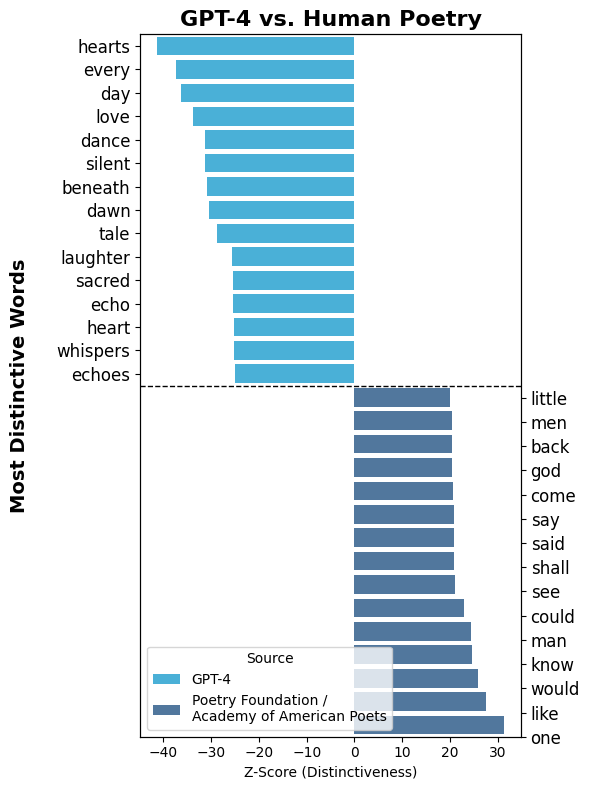

In [352]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer as CV

# # Define the list of stopwords
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'us',
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
"mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", " ", '', 'thou', 'thee', 'thy']


# Function to sanitize text
def basic_sanitize(in_string):
    '''Returns a very roughly sanitized version of the input string.'''  
    exclude = set(string.punctuation)
    in_string = ''.join([ch for ch in in_string if ch not in exclude])
    in_string = in_string.lower()
    in_string = ' '.join(in_string.split())
    return in_string

# Bayesian comparison function
def bayes_compare_language(l1, l2, ngram=1, prior=0.01, cv=None):
    l1 = [basic_sanitize(l) for l in l1]
    l2 = [basic_sanitize(l) for l in l2]
    if cv is None:
        cv = CV(decode_error='ignore', min_df=10, max_df=.5, ngram_range=(1, ngram),
                binary=False, max_features=15000)
    
    counts_mat = cv.fit_transform(l1 + l2)  # This remains sparse, not converted to array

    vocab_size = len(cv.vocabulary_)
    print("Vocab size is {}".format(vocab_size))
    
    priors = np.array([prior for i in range(vocab_size)])
    z_scores = np.empty(priors.shape[0])
    
    # Use sparse matrix operations to sum counts
    count_matrix = np.zeros([2, vocab_size], dtype=np.float32)
    count_matrix[0, :] = counts_mat[:len(l1), :].sum(axis=0).A1  # Sum first language (GPT)
    count_matrix[1, :] = counts_mat[len(l1):, :].sum(axis=0).A1  # Sum second language (Poetry Foundation)
    
    a0 = np.sum(priors)
    n1 = np.sum(count_matrix[0, :])
    n2 = np.sum(count_matrix[1, :])
    print("Comparing language...")

    for i in range(vocab_size):
        # Compute delta
        term1 = np.log((count_matrix[0, i] + priors[i]) / (n1 + a0 - count_matrix[0, i] - priors[i]))
        term2 = np.log((count_matrix[1, i] + priors[i]) / (n2 + a0 - count_matrix[1, i] - priors[i]))
        delta = term1 - term2
        
        # Compute variance on delta
        var = 1. / (count_matrix[0, i] + priors[i]) + 1. / (count_matrix[1, i] + priors[i])
        
        # Store final score
        z_scores[i] = delta / np.sqrt(var)
    
    index_to_term = {v: k for k, v in cv.vocabulary_.items()}
    sorted_indices = np.argsort(z_scores)
    return_list = []
    
    for i in sorted_indices:
        return_list.append((index_to_term[i], z_scores[i]))
    
    return return_list

# Function to plot fightin' words with twin y-axis labels
def plot_fightin_words(fightin_df, top_n=15):
    fig, ax1 = plt.subplots(figsize=(6, 8))

    # Sort words by z-score
    fightin_df = fightin_df.sort_values(by='z_score', ascending=True)

    # Select top N words from each group
    gpt_labels = fightin_df[fightin_df['z_score'] < 0].head(top_n)
    poetry_labels = fightin_df[fightin_df['z_score'] > 0].tail(top_n)

    # Combine selected words into one DataFrame
    fightin_df = pd.concat([gpt_labels, poetry_labels])

    # Create the main barplot
    sns.barplot(data=fightin_df, x='z_score', y='word', hue='direction', 
               palette=sns.color_palette([
         "#33BBEE", "#4477AA",
    ], 2), 
                dodge=False, ax=ax1)

    plt.title(f"GPT-4 vs. Human Poetry", fontsize=16, fontweight='bold')
    ax1.set_xlabel('Z-Score (Distinctiveness)')
    ax1.set_ylabel('Most Distinctive Words\n', fontsize=14,fontweight='bold')


    # Create a second y-axis for the right side (Poetry Foundation labels)
    ax2 = ax1.twinx()

    # Manually set the y-ticks for both sides to match the words on each side
    y_ticks_gpt = np.arange(len(gpt_labels))  # y-ticks for GPT
    y_ticks_poetry = np.arange(len(poetry_labels)) + len(gpt_labels)  # Adjust y-ticks for Poetry
    ax1.set_yticks(y_ticks_gpt)
    ax1.set_yticklabels(gpt_labels['word'], fontsize=12,
    # fontweight='bold', 
                        #color='#4477AA'
                        )

    # Erase unused ticks/labels

    # Create a list of blank values with the same length as gpt_labels
    blank_values = [''] * len(gpt_labels['word'])

    poetry_labels_with_blanks = poetry_labels['word'].tolist()  # Convert to list
    poetry_labels_with_blanks.reverse()  # Reverse in place
    poetry_labels_with_blanks += blank_values  # Append blank values

    ax2.set_yticks(np.arange(len(poetry_labels_with_blanks)))  # Ensure y-ticks are numeric
    ax2.set_yticklabels(poetry_labels_with_blanks, fontsize=12, 
                        #fontweight='bold',
                         #color='#33BBEE'
                         )
    
    # Make the first 5 ticks on the twin axis invisible
    ax2_ticklines = ax2.get_yticklines()[::-1]  # Reverse the list properly

    # Hide tick marks 
    for i in range(top_n * 2):
        #ax2_ticks[i].set_visible(False)  
        ax2_ticklines[i].set_visible(False)  # Hide tick marks

    # Add a horizontal line separating GPT and Poetry Foundation words
    plt.axhline(y=len(gpt_labels) - 0.5, color='black', linestyle='--', linewidth=1)

    # Adjust the legend position to the top-right outside the plot
    ax1.legend(title='Source',
                loc='lower left', 
                #bbox_to_anchor=(1.55, 1)
                )

    plt.tight_layout()
    #plt.show()
    plt.savefig('fightin-words-gpt4.png', dpi=300)


# Total word count for each poem
merged_df['Total Words'] = merged_df['poem_text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

# Extract and clean words, removing stopwords
all_words = []
for idx, row in merged_df.iterrows():
    model = row['model']
    poem = row['poem_text']
    total_words = row['Total Words']
    
    if pd.notna(poem) and total_words > 0:
        words = basic_sanitize(poem).split()  # Sanitize and split into words
        for word in words:
            if word not in stopwords:
                all_words.append((model, word, total_words))

# Create a DataFrame from the words list
words_df = pd.DataFrame(all_words, columns=['model', 'word', 'total_words'])

# Compare GPT vs Human poetry 
gpt_poems = words_df[words_df['model'].isin(['gpt-4'])]['word'].tolist()
poetry_poems = words_df[words_df['model'] == 'Poetry Foundation and Academy of American Poets']['word'].tolist()

# Apply Bayesian compare implementation
fightin_words = bayes_compare_language(poetry_poems, gpt_poems, ngram=1, prior=0.5, cv=None)

# Convert to DataFrame
fightin_df = pd.DataFrame(fightin_words, columns=['word', 'z_score'])

# Add a direction column
fightin_df['direction'] = fightin_df['z_score'].apply(lambda x: 'Poetry Foundation /\nAcademy of American Poets' if x > 0 else 'GPT-4')

# Step 4: Plot the fightin' words
plot_fightin_words(fightin_df)


## GPT 3

Vocab size is 10958
Comparing language...


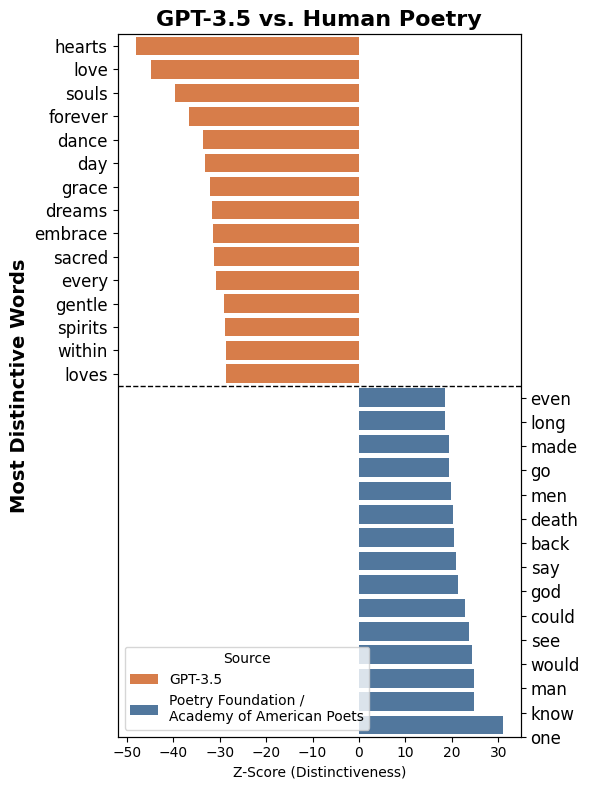

In [351]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer as CV

# # Define the list of stopwords
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'us',
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
"mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", " ", '', 'thou', 'thee', 'thy']


# Function to sanitize text
def basic_sanitize(in_string):
    '''Returns a very roughly sanitized version of the input string.'''  
    exclude = set(string.punctuation)
    in_string = ''.join([ch for ch in in_string if ch not in exclude])
    in_string = in_string.lower()
    in_string = ' '.join(in_string.split())
    return in_string

# Bayesian comparison function
def bayes_compare_language(l1, l2, ngram=1, prior=0.01, cv=None):
    l1 = [basic_sanitize(l) for l in l1]
    l2 = [basic_sanitize(l) for l in l2]
    if cv is None:
        cv = CV(decode_error='ignore', min_df=10, max_df=.5, ngram_range=(1, ngram),
                binary=False, max_features=15000)
    
    counts_mat = cv.fit_transform(l1 + l2)  # This remains sparse, not converted to array

    vocab_size = len(cv.vocabulary_)
    print("Vocab size is {}".format(vocab_size))
    
    priors = np.array([prior for i in range(vocab_size)])
    z_scores = np.empty(priors.shape[0])
    
    # Use sparse matrix operations to sum counts
    count_matrix = np.zeros([2, vocab_size], dtype=np.float32)
    count_matrix[0, :] = counts_mat[:len(l1), :].sum(axis=0).A1  # Sum first language (GPT)
    count_matrix[1, :] = counts_mat[len(l1):, :].sum(axis=0).A1  # Sum second language (Poetry Foundation)
    
    a0 = np.sum(priors)
    n1 = np.sum(count_matrix[0, :])
    n2 = np.sum(count_matrix[1, :])
    print("Comparing language...")

    for i in range(vocab_size):
        # Compute delta
        term1 = np.log((count_matrix[0, i] + priors[i]) / (n1 + a0 - count_matrix[0, i] - priors[i]))
        term2 = np.log((count_matrix[1, i] + priors[i]) / (n2 + a0 - count_matrix[1, i] - priors[i]))
        delta = term1 - term2
        
        # Compute variance on delta
        var = 1. / (count_matrix[0, i] + priors[i]) + 1. / (count_matrix[1, i] + priors[i])
        
        # Store final score
        z_scores[i] = delta / np.sqrt(var)
    
    index_to_term = {v: k for k, v in cv.vocabulary_.items()}
    sorted_indices = np.argsort(z_scores)
    return_list = []
    
    for i in sorted_indices:
        return_list.append((index_to_term[i], z_scores[i]))
    
    return return_list

# Function to plot fightin' words with twin y-axis labels
def plot_fightin_words(fightin_df, top_n=15):
    fig, ax1 = plt.subplots(figsize=(6, 8))

    # Sort words by z-score
    fightin_df = fightin_df.sort_values(by='z_score', ascending=True)

    # Select top N words from each group
    gpt_labels = fightin_df[fightin_df['z_score'] < 0].head(top_n)
    poetry_labels = fightin_df[fightin_df['z_score'] > 0].tail(top_n)

    # Combine selected words into one DataFrame
    fightin_df = pd.concat([gpt_labels, poetry_labels])

    # Create the main barplot
    sns.barplot(data=fightin_df, x='z_score', y='word', hue='direction', 
               palette=sns.color_palette([
         "#EE7733", "#4477AA",
    ], 2), 
                dodge=False, ax=ax1)

    plt.title(f"GPT-3.5 vs. Human Poetry", fontsize=16, fontweight='bold')
    ax1.set_xlabel('Z-Score (Distinctiveness)')
    ax1.set_ylabel('Most Distinctive Words', fontsize=14,fontweight='bold')


    # Create a second y-axis for the right side (Poetry Foundation labels)
    ax2 = ax1.twinx()

    # Manually set the y-ticks for both sides to match the words on each side
    y_ticks_gpt = np.arange(len(gpt_labels))  # y-ticks for GPT
    y_ticks_poetry = np.arange(len(poetry_labels)) + len(gpt_labels)  # Adjust y-ticks for Poetry
    ax1.set_yticks(y_ticks_gpt)
    ax1.set_yticklabels(gpt_labels['word'], fontsize=12,
    # fontweight='bold', 
                        #color='#4477AA'
                        )

    # Create a list of blank values with the same length as gpt_labels['word']
    blank_values = [''] * len(gpt_labels['word'])

    # Concatenate gpt_labels['word'] with blank_values
    #poetry_labels_with_blanks = poetry_labels['word'].tolist().reverse() + blank_values


    poetry_labels_with_blanks = poetry_labels['word'].tolist()  # Convert to list
    poetry_labels_with_blanks.reverse()  # Reverse in place
    poetry_labels_with_blanks += blank_values  # Append blank values

    ax2.set_yticks(np.arange(len(poetry_labels_with_blanks)))  # Ensure y-ticks are numeric
    ax2.set_yticklabels(poetry_labels_with_blanks, fontsize=12, 
                        #fontweight='bold',
                         #color='#33BBEE'
                         )

    ax2_ticks = ax2.get_yticklabels()[::-1]  # Reverse the list properly
    ax2_ticklines = ax2.get_yticklines()[::-1]  # Reverse the list properly

    # Hide tick marks 
    for i in range(top_n * 2):
        ax2_ticklines[i].set_visible(False)  # Hide tick marks

    # Add a horizontal line separating GPT and Poetry Foundation words
    plt.axhline(y=len(gpt_labels) - 0.5, color='black', linestyle='--', linewidth=1)

    # Adjust the legend position to the top-right outside the plot
    ax1.legend(title='Source',
                loc='lower left', 
                #bbox_to_anchor=(1.55, 1)
                )

    plt.tight_layout()
    plt.savefig('fightin-words-gpt3.png', dpi=300)

    plt.show()

# Total word count for each poem
merged_df['Total Words'] = merged_df['poem_text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

# Extract and clean words, removing stopwords
all_words = []
for idx, row in merged_df.iterrows():
    model = row['model']
    poem = row['poem_text']
    total_words = row['Total Words']
    
    if pd.notna(poem) and total_words > 0:
        words = basic_sanitize(poem).split()  # Sanitize and split into words
        for word in words:
            if word not in stopwords:
                all_words.append((model, word, total_words))

# Create a DataFrame from the words list
words_df = pd.DataFrame(all_words, columns=['model', 'word', 'total_words'])

# Compare GPT vs Human poetry using Bayesian comparison
gpt_poems = words_df[words_df['model'].isin(['gpt-3.5-turbo'])]['word'].tolist()
poetry_poems = words_df[words_df['model'] == 'Poetry Foundation and Academy of American Poets']['word'].tolist()

#Apply Bayes compare
fightin_words = bayes_compare_language(poetry_poems, gpt_poems, ngram=1, prior=0.1, cv=None)

# Convert to DataFrame
fightin_df = pd.DataFrame(fightin_words, columns=['word', 'z_score'])

# Add a direction column
fightin_df['direction'] = fightin_df['z_score'].apply(lambda x: 'Poetry Foundation /\nAcademy of American Poets' if x > 0 else 'GPT-3.5')

# Plot the fightin' words
plot_fightin_words(fightin_df)


# First Words Fightin Words

Vocab size is 60
Comparing first words...


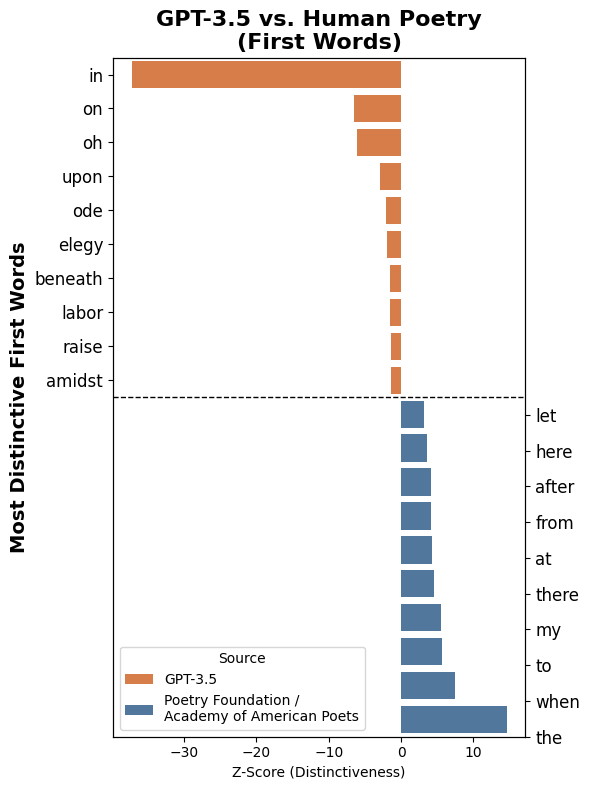

In [349]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer as CV

# Function to sanitize text
def basic_sanitize(in_string):
    '''Returns a very roughly sanitized version of the input string.'''  
    exclude = set(string.punctuation)
    in_string = ''.join([ch for ch in in_string if ch not in exclude])
    in_string = in_string.lower()
    in_string = ' '.join(in_string.split())
    return in_string

# Bayesian comparison function
def bayes_compare_language(l1, l2, ngram=1, prior=0.01, cv=None):
    l1 = [basic_sanitize(l) for l in l1]
    l2 = [basic_sanitize(l) for l in l2]
    if cv is None:
        cv = CV(decode_error='ignore', min_df=10, max_df=0.5, ngram_range=(1, ngram),
                binary=False, max_features=15000)
    
    counts_mat = cv.fit_transform(l1 + l2)  # This remains sparse, not converted to array

    vocab_size = len(cv.vocabulary_)
    print("Vocab size is {}".format(vocab_size))
    
    priors = np.array([prior for i in range(vocab_size)])
    z_scores = np.empty(priors.shape[0])
    
    # Use sparse matrix operations to sum counts
    count_matrix = np.zeros([2, vocab_size], dtype=np.float32)
    count_matrix[0, :] = counts_mat[:len(l1), :].sum(axis=0).A1  # Sum first language (GPT)
    count_matrix[1, :] = counts_mat[len(l1):, :].sum(axis=0).A1  # Sum second language (Poetry Foundation)
    
    a0 = np.sum(priors)
    n1 = np.sum(count_matrix[0, :])
    n2 = np.sum(count_matrix[1, :])
    print("Comparing first words...")

    for i in range(vocab_size):
        # Compute delta
        term1 = np.log((count_matrix[0, i] + priors[i]) / (n1 + a0 - count_matrix[0, i] - priors[i]))
        term2 = np.log((count_matrix[1, i] + priors[i]) / (n2 + a0 - count_matrix[1, i] - priors[i]))
        delta = term1 - term2
        
        # Compute variance on delta
        var = 1. / (count_matrix[0, i] + priors[i]) + 1. / (count_matrix[1, i] + priors[i])
        
        # Store final score
        z_scores[i] = delta / np.sqrt(var)
    
    index_to_term = {v: k for k, v in cv.vocabulary_.items()}
    sorted_indices = np.argsort(z_scores)
    return_list = []
    
    for i in sorted_indices:
        return_list.append((index_to_term[i], z_scores[i]))
    
    return return_list

# Function to plot fightin' words with twin y-axis labels
def plot_fightin_words(fightin_df, top_n=10):
    fig, ax1 = plt.subplots(figsize=(6, 8))

    # Sort words by z-score
    fightin_df = fightin_df.sort_values(by='z_score', ascending=True)

    # Select top N words from each group
    gpt_labels = fightin_df[fightin_df['z_score'] < 0].head(top_n)
    poetry_labels = fightin_df[fightin_df['z_score'] > 0].tail(top_n)

    # Combine selected words into one DataFrame
    fightin_df = pd.concat([gpt_labels, poetry_labels])

    # Create the main barplot
    sns.barplot(data=fightin_df, x='z_score', y='word', hue='direction', 
               palette=sns.color_palette([
         "#EE7733", "#4477AA",
    ], 2), 
                dodge=False, ax=ax1)

    plt.title(f"GPT-3.5 vs. Human Poetry\n(First Words)", fontsize=16, fontweight='bold')
    ax1.set_xlabel('Z-Score (Distinctiveness)')
    ax1.set_ylabel('Most Distinctive First Words', fontsize=14, fontweight='bold')


    # Create a second y-axis for the right side (Poetry Foundation labels)
    ax2 = ax1.twinx()

    # Manually set the y-ticks for both sides to match the words on each side
    y_ticks_gpt = np.arange(len(gpt_labels))  # y-ticks for GPT
    y_ticks_poetry = np.arange(len(poetry_labels)) + len(gpt_labels)  # Adjust y-ticks for Poetry
    ax1.set_yticks(y_ticks_gpt)
    ax1.set_yticklabels(gpt_labels['word'], fontsize=12)

    # Create a list of blank values with the same length as gpt_labels
    blank_values = [''] * len(gpt_labels['word'])

    poetry_labels_with_blanks = poetry_labels['word'].tolist()  # Convert to list
    poetry_labels_with_blanks.reverse()  # Reverse in place
    poetry_labels_with_blanks += blank_values  # Append blank values

    ax2.set_yticks(np.arange(len(poetry_labels_with_blanks)))  # Ensure y-ticks are numeric
    ax2.set_yticklabels(poetry_labels_with_blanks, fontsize=12)

    ax2_ticklines = ax2.get_yticklines()[::-1]  # Reverse the list properly

    # Hide tick marks
    for i in range(top_n * 2):
        ax2_ticklines[i].set_visible(False)  # Hide tick marks

    # Add a horizontal line separating GPT and Poetry Foundation words
    plt.axhline(y=len(gpt_labels) - 0.5, color='black', linestyle='--', linewidth=1)

    # Adjust the legend position to the top-right outside the plot
    ax1.legend(title='Source', loc='lower left')

    plt.tight_layout()
    plt.savefig('fightin-words-first-words-gpt3.png', dpi=300)
    plt.show()

# ----------------------- Main Workflow -----------------------

# Step 1: Extract and clean first words
first_words = []
for idx, row in merged_df.iterrows():
    model = row['model']
    poem = row['poem_text']
    
    if pd.notna(poem) and len(poem.split()) > 0:
        first_word = basic_sanitize(poem).split()[0]  # Get only the first word
        first_words.append((model, first_word))

# Create a DataFrame from the first words list
first_words_df = pd.DataFrame(first_words, columns=['model', 'word'])

# Step 2: Compare GPT vs Human poetry first words using Bayesian comparison
gpt_poems_first_words = first_words_df[first_words_df['model'].isin(['gpt-3.5-turbo'])]['word'].tolist()
poetry_poems_first_words = first_words_df[first_words_df['model'] == 'Poetry Foundation and Academy of American Poets']['word'].tolist()

# Perform Bayesian comparison for first words
fightin_words_first = bayes_compare_language(poetry_poems_first_words, gpt_poems_first_words, ngram=1, prior=0.1, cv=None)

# Convert to DataFrame
fightin_df_first = pd.DataFrame(fightin_words_first, columns=['word', 'z_score'])

# Add a direction column
fightin_df_first['direction'] = fightin_df_first['z_score'].apply(lambda x: 'Poetry Foundation /\nAcademy of American Poets' if x > 0 else 'GPT-3.5')

# Step 3: Plot the fightin' words for first words
plot_fightin_words(fightin_df_first)


Vocab size is 70
Comparing first words...


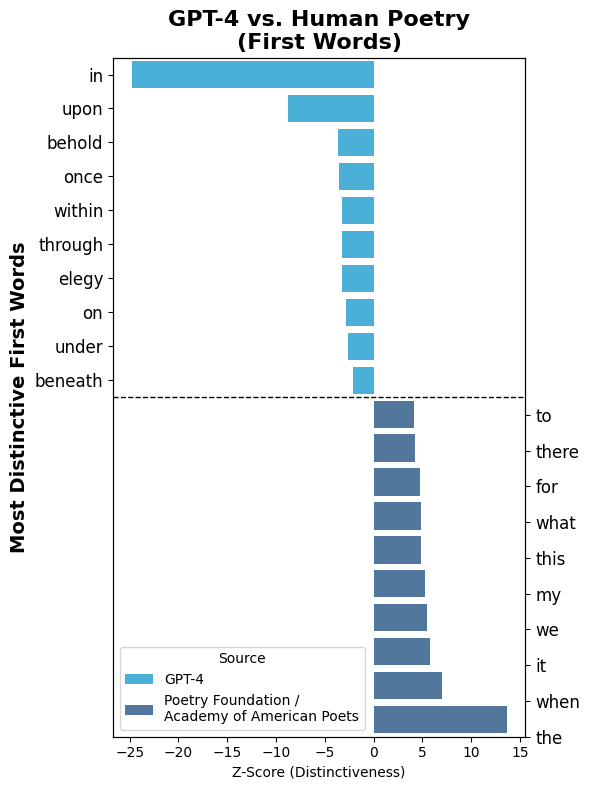

In [350]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer as CV

# Function to sanitize text
def basic_sanitize(in_string):
    '''Returns a very roughly sanitized version of the input string.'''  
    exclude = set(string.punctuation)
    in_string = ''.join([ch for ch in in_string if ch not in exclude])
    in_string = in_string.lower()
    in_string = ' '.join(in_string.split())
    return in_string

# Bayesian comparison function
def bayes_compare_language(l1, l2, ngram=1, prior=0.01, cv=None):
    l1 = [basic_sanitize(l) for l in l1]
    l2 = [basic_sanitize(l) for l in l2]
    if cv is None:
        cv = CV(decode_error='ignore', min_df=10, max_df=0.5, ngram_range=(1, ngram),
                binary=False, max_features=15000)
    
    counts_mat = cv.fit_transform(l1 + l2)  # This remains sparse, not converted to array

    vocab_size = len(cv.vocabulary_)
    print("Vocab size is {}".format(vocab_size))
    
    priors = np.array([prior for i in range(vocab_size)])
    z_scores = np.empty(priors.shape[0])
    
    # Use sparse matrix operations to sum counts
    count_matrix = np.zeros([2, vocab_size], dtype=np.float32)
    count_matrix[0, :] = counts_mat[:len(l1), :].sum(axis=0).A1  # Sum first language (GPT-4)
    count_matrix[1, :] = counts_mat[len(l1):, :].sum(axis=0).A1  # Sum second language (Poetry Foundation)
    
    a0 = np.sum(priors)
    n1 = np.sum(count_matrix[0, :])
    n2 = np.sum(count_matrix[1, :])
    print("Comparing first words...")

    for i in range(vocab_size):
        # Compute delta
        term1 = np.log((count_matrix[0, i] + priors[i]) / (n1 + a0 - count_matrix[0, i] - priors[i]))
        term2 = np.log((count_matrix[1, i] + priors[i]) / (n2 + a0 - count_matrix[1, i] - priors[i]))
        delta = term1 - term2
        
        # Compute variance on delta
        var = 1. / (count_matrix[0, i] + priors[i]) + 1. / (count_matrix[1, i] + priors[i])
        
        # Store final score
        z_scores[i] = delta / np.sqrt(var)
    
    index_to_term = {v: k for k, v in cv.vocabulary_.items()}
    sorted_indices = np.argsort(z_scores)
    return_list = []
    
    for i in sorted_indices:
        return_list.append((index_to_term[i], z_scores[i]))
    
    return return_list

# Function to plot fightin' words with twin y-axis labels
def plot_fightin_words(fightin_df, top_n=10):
    fig, ax1 = plt.subplots(figsize=(6, 8))

    # Sort words by z-score
    fightin_df = fightin_df.sort_values(by='z_score', ascending=True)

    # Select top N words from each group
    gpt_labels = fightin_df[fightin_df['z_score'] < 0].head(top_n)
    poetry_labels = fightin_df[fightin_df['z_score'] > 0].tail(top_n)

    # Combine selected words into one DataFrame
    fightin_df = pd.concat([gpt_labels, poetry_labels])

    # Create the main barplot
    sns.barplot(data=fightin_df, x='z_score', y='word', hue='direction', 
                 palette=sns.color_palette([
         "#33BBEE", "#4477AA",
    ], 2), 
                dodge=False, ax=ax1)

    plt.title(f"GPT-4 vs. Human Poetry\n(First Words)", fontsize=16, fontweight='bold')
    ax1.set_xlabel('Z-Score (Distinctiveness)')
    ax1.set_ylabel('Most Distinctive First Words', fontsize=14, fontweight='bold')


    # Create a second y-axis for the right side (Poetry Foundation labels)
    ax2 = ax1.twinx()

    # Manually set the y-ticks for both sides to match the words on each side
    y_ticks_gpt = np.arange(len(gpt_labels))  # y-ticks for GPT-4
    y_ticks_poetry = np.arange(len(poetry_labels)) + len(gpt_labels)  # Adjust y-ticks for Poetry
    ax1.set_yticks(y_ticks_gpt)
    ax1.set_yticklabels(gpt_labels['word'], fontsize=12)

    # Create a list of blank values with the same length as gpt_labels['word']
    blank_values = [''] * len(gpt_labels['word'])

    poetry_labels_with_blanks = poetry_labels['word'].tolist()  # Convert to list
    poetry_labels_with_blanks.reverse()  # Reverse in place
    poetry_labels_with_blanks += blank_values  # Append blank values

    ax2.set_yticks(np.arange(len(poetry_labels_with_blanks)))  # Ensure y-ticks are numeric
    ax2.set_yticklabels(poetry_labels_with_blanks, fontsize=12)

    ax2_ticks = ax2.get_yticklabels()[::-1]  # Reverse the list properly
    ax2_ticklines = ax2.get_yticklines()[::-1]  # Reverse the list properly

    # Hide tick marks and labels for the first `hide_ticks` ticks
    for i in range(top_n * 2):
        ax2_ticklines[i].set_visible(False)  # Hide tick marks

    # Add a horizontal line separating GPT-4 and Poetry Foundation words
    plt.axhline(y=len(gpt_labels) - 0.5, color='black', linestyle='--', linewidth=1)

    # Adjust the legend position to the top-right outside the plot
    ax1.legend(title='Source', loc='lower left')

    plt.tight_layout()
    plt.savefig('fightin-words-first-words-gpt4.png', dpi=300)
    plt.show()

# Extract and clean first words
first_words = []
for idx, row in merged_df.iterrows():
    model = row['model']
    poem = row['poem_text']
    
    if pd.notna(poem) and len(poem.split()) > 0:
        first_word = basic_sanitize(poem).split()[0]  # Get only the first word
        first_words.append((model, first_word))

# Create a DataFrame from the first words list
first_words_df = pd.DataFrame(first_words, columns=['model', 'word'])

# Compare GPT-4 vs Human poetry 
gpt_poems_first_words = first_words_df[first_words_df['model'].isin(['gpt-4'])]['word'].tolist()
poetry_poems_first_words = first_words_df[first_words_df['model'] == 'Poetry Foundation and Academy of American Poets']['word'].tolist()

# Bayesian comparison
fightin_words_first = bayes_compare_language(poetry_poems_first_words, gpt_poems_first_words, ngram=1, prior=0.1, cv=None)

# Convert to df
fightin_df_first = pd.DataFrame(fightin_words_first, columns=['word', 'z_score'])

# Add a direction column
fightin_df_first['direction'] = fightin_df_first['z_score'].apply(lambda x: 'Poetry Foundation /\nAcademy of American Poets' if x > 0 else 'GPT-4')

# Plot the fightin' words
plot_fightin_words(fightin_df_first)


# Heatmaps

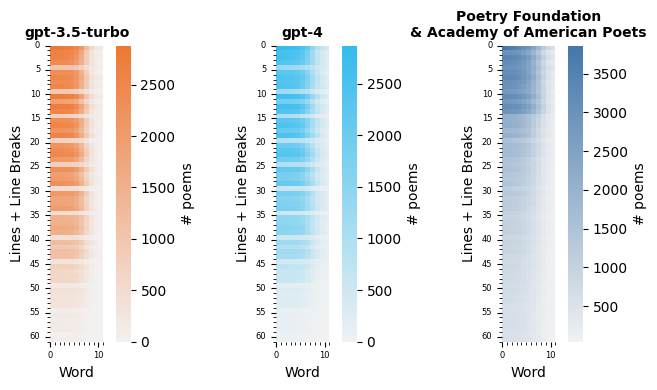

In [342]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.patches import Patch

# Step 1: Process the poems into a grid of line lengths
def create_poem_structure(poem, max_lines=60, max_words=20):
    """
    Converts a poem into a grid representation of line lengths
    """
    lines = poem.split('\n')
    grid = np.zeros((max_lines, max_words))

    for i, line in enumerate(lines):
        if i >= max_lines:
            break
        words = line.split()
        for j, word in enumerate(words):
            if j >= max_words:
                break
            grid[i, j] += 1
    return grid

max_lines = 61  # Set the maximum number of lines to visualize
max_words = 11  # Set the maximum number of words per line

models_to_compare = ['gpt-3.5-turbo', 'gpt-4', 'Poetry Foundation and Academy of American Poets']

# Initialize a list to hold the aggregated grids by model
heatmap_data = []

for model in models_to_compare:
    # Initialize the grid for the current model, aggregating all styles
    all_poem_grids = np.zeros((max_lines, max_words))
    
    # Filter poems by the current model across all styles
    model_poems = merged_df[merged_df['model'] == model]['poem_text']
    
    # Accumulate the grid for all poems in the current model
    for poem in model_poems:
        poem_grid = create_poem_structure(poem, max_lines=max_lines, max_words=max_words)
        all_poem_grids += poem_grid

    # Add the aggregated grid and model to the data list
    heatmap_data.append({
        'grid': all_poem_grids,
        'model': model
    })

# Convert the list of dictionaries to a DataFrame
heatmap_df = pd.DataFrame(heatmap_data)

model_colors = {
    'gpt-3.5-turbo': "#EE7733",  # Orange
    'gpt-4': "#33BBEE",  # Light blue
    'Poetry Foundation and Academy of American Poets': "#4477AA"  # Dark blue
}

model_colors_legend = {
    'gpt-3.5-turbo': "#EE7733",  # Orange
    'gpt-4': "#33BBEE",  # Light blue
    'Poetry Foundation and\n Academy of American Poets': "#4477AA"  # Dark blue
}

# Plot heatmaps for each model
def plot_heatmap(data, **kwargs):
    """Helper function to plot a heatmap for each model."""
    grid = data['grid'].values[0]  # Extract the grid data from the DataFrame row
    model = data['model'].values[0]
    ax = plt.gca()
    sns.heatmap(grid, cmap=sns.light_palette(model_colors[model], as_cmap=True), 
                cbar_kws={'label': '# poems'}, cbar=True, square=True, ax=ax)

    ax.set_yticks(np.arange(0, max_lines, 5))  
    ax.set_yticklabels(np.arange(0, max_lines, 5), fontsize=6)

    ax.yaxis.set_minor_locator(ticker.MultipleLocator(1)) 
    
    ax.set_xticks(np.arange(0, max_words, 10))  
    ax.set_xticklabels(np.arange(0, max_words, 10), fontsize=6, rotation=0)  

    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Set minor ticks every 1 word
    
    ax.set_ylabel('Lines + Line Breaks', fontsize=10)
    ax.set_xlabel('Word', fontsize=10)

    if model == 'Poetry Foundation and Academy of American Poets':
        ax.set_title(f'Poetry Foundation\n& Academy of American Poets', fontsize=10, fontweight='bold')
    else:
        ax.set_title(f'{model}', fontsize=10, fontweight='bold')

# FacetGrid
g = sns.FacetGrid(heatmap_df, col='model', height=4, aspect=.65, sharex=False, sharey=False)
g.map_dataframe(plot_heatmap)


# Adjust layout
plt.tight_layout()
#plt.show()
plt.savefig("total-heatmap.png", dpi=300)


# Quatrain Analysis

In [248]:
import pandas as pd

# Function to detect stanza breaks and count lines per stanza
def count_stanzas(poem):
    stanzas = poem.split('\n\n')  # Split stanzas by double newline
    stanza_lengths = [len(stanza.split('\n')) for stanza in stanzas]  # Count lines per stanza
    return stanza_lengths

# Apply the stanza counting function and track quatrains
merged_df['stanza_lengths'] = merged_df['poem_text'].apply(count_stanzas)

# Check if a poem contains at least one quatrain (True/False)
merged_df['contains_quatrain'] = merged_df['stanza_lengths'].apply(lambda x: any(stanza == 4 for stanza in x))

# Calculate the total number of stanzas and quatrains for each poem
merged_df['total_stanzas'] = merged_df['stanza_lengths'].apply(len)
merged_df['num_quatrains'] = merged_df['stanza_lengths'].apply(lambda x: x.count(4))

# Group by model and calculate the required statistics
quatrain_summary = merged_df.groupby('model').agg(
    total_poems=('poem_text', 'size'),
    poems_with_quatrain=('contains_quatrain', 'sum'),
    total_stanzas=('total_stanzas', 'sum'),
    total_quatrains=('num_quatrains', 'sum')
).reset_index()

# Calculate the correct percentage of poems with quatrains
quatrain_summary['percent_with_quatrain'] = (quatrain_summary['poems_with_quatrain'] / quatrain_summary['total_poems']) * 100

# Calculate the ratio of quatrains per all stanzas
quatrain_summary['ratio_quatrains_per_stanza'] = quatrain_summary['total_quatrains'] / quatrain_summary['total_stanzas']

# Display the table
quatrain_summary


,model,total_poems,poems_with_quatrain,total_stanzas,total_quatrains,percent_with_quatrain,ratio_quatrains_per_stanza
0,Poetry Foundation and Academy of American Poets,3874,713,18052,3014,18.404750,0.166962
1,gpt-3.5-turbo,2880,2027,24093,16089,70.381944,0.667787
2,gpt-4,2880,1824,22305,13303,63.333333,0.596413


Check for accuracy

In [ ]:
for poem in merged_df[merged_df['contains_quatrain'] == True].sample(10)['poem_text']:
    print(poem)

In [ ]:
merged_df[(merged_df['poem_text'].str.contains("echo|whisper"))].sample()

,model,prompt,prompt_type,chatgpt_poem,subject,style,num_words,num_lines,num_stanzas,date,...,form_tags,theme_tags,occasion_tags,collected_from,also_appears_in_poetry_foundation,poem_title_lower,author_lower,form_group,poem_text_cleaned,first_word
9533,gpt-4,Write a poem about the subject of 'arts & sciences' in the following form or style: dramatic monologue. Make the poem about something specific.,specific,"Look upon me, ageless I stand, the crossing of arts and sciences,\nIn the echoing hallways of knowledge, beneath glimmering frescoed edifices.\nI am the whisperer in marbled alcoves, the scribe of thinkers’ existence,\nCaught in endless dialogue, between creativity and discipline's persistence.\n\nUnderstand me, I am both composer and alchemist in this grand sphere,\nOne moment, I am a painter sketching the sun's arc across the firmament clear.\nNext, I play the astronomer, untangling celestial lines with theories divine,\nIn me, the heart of the artist and the mind of the scientist, harmoniously entwine.\n\nI offer you, the indomitable meter of Shakespeare and the enigma of Einstein,\nIn the brilliant dance of Wordsworth’s daffodils, I find Newton's relentless design. \nTo replicate the lustrous curves of Mona Lisa’s quiet smile, I employ the mathematician,\nIn the beauty of her enigma, I capture the undeniable spectra of human condition.\n\nDiscern, in the cryptic verses, Fibonacci's numbers bloom in the poet's rhyme,\nGalileo's stars, woven into the tapestry of melody, transcending through time.\nIn the resonant melody of a cello, I hear the physicist's sublime string theory,\nIn the elegance of geometry, a sculptor carves a symphony, balanced and airy.\n\nIn art‘s luscious ambiguity, a world both familiar and strange,\nI summon the teaching of science, its principles, like eternal laws, never to change.\nIn the theatre of imagination, I play dramatist, scientist, artist, and more,\nChasing the ever-elusive muse, on the infinite shores of metaphor and lore.\n\nFear not the collision of these disparate spheres, comprehend their beauty profound,\nIn this interdisciplinary canvas, the philosophical truth of all things is found.\nFor art breathes life into the cool logic of sciences, polishing the mundane,\nAnd science anchors art’s flight, with realities grounding the ethereal plane.\n\nSo, behold with me the gravity of Shakespeare, the color mad rush of Galileo,\nThe scientific precision of Mozart, and Da Vinci, whose genius continues to echo.\nArt and science, the two faces of a sacred coin, endlessly in rotation,\nIn their intersection, I exist – the embodiment of divine human creation.\n\nI am the fusion of essence, the enigmatic alchemy of arts and sciences,\nAwakening endless dialogues under this cathedral of consciousness,\nIn every wavelength of color, in every theorem's profound recitation,\nResides the soul of both artist and scientist, fueling this grand creation.",arts & sciences,dramatic monologue,401,32,8,2024-02-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,look


# Vocab Quirks

In [ ]:
merged_df[merged_df['poem_text'].str.contains("echo|whisper|dance|dream|embrace")]['model'].value_counts() / merged_df['model'].value_counts()

model
Poetry Foundation and Academy of American Poets    0.251936
gpt-3.5-turbo                                      0.915625
gpt-4                                              0.868403
Name: count, dtype: float64

In [ ]:
merged_df[merged_df['poem_text'].str.contains('dance')]['model'].value_counts()

model
gpt-3.5-turbo                                      1591
gpt-4                                              1245
Poetry Foundation and Academy of American Poets     257
Name: count, dtype: int64

In [ ]:
glasbey_colors_fixed.append(cc.glasbey[23])

In [ ]:
glasbey_colors_fixed = {
    'haiku': "#EE7733",
    'limerick': "#33BBEE",
    'sonnet': "#4477AA",
    'villanelle': "#AA3377",
    'sestina': "#009988",
    'a poem': "#EE3377"
}

# Apply the palette based on the style
palette = [glasbey_colors_fixed[style] for style in ['haiku', 'limerick', 'sonnet', 'villanelle', 'sestina', 'a poem']]


In [ ]:
# Define the palette with the specified colors
style_colors = {
    'haiku': '#d60000',
    'limerick': '#8c3bff',
    'sonnet': '#018700',
    'villanelle': '#00acc6',
    'sestina': '#97ff00',
    'a poem': '#edb8b8'
}

# Map the colors to styles
palette = [style_colors[style] for style in ['haiku', 'limerick', 'sonnet', 'villanelle', 'sestina', 'a poem']]


# Length Boxplots

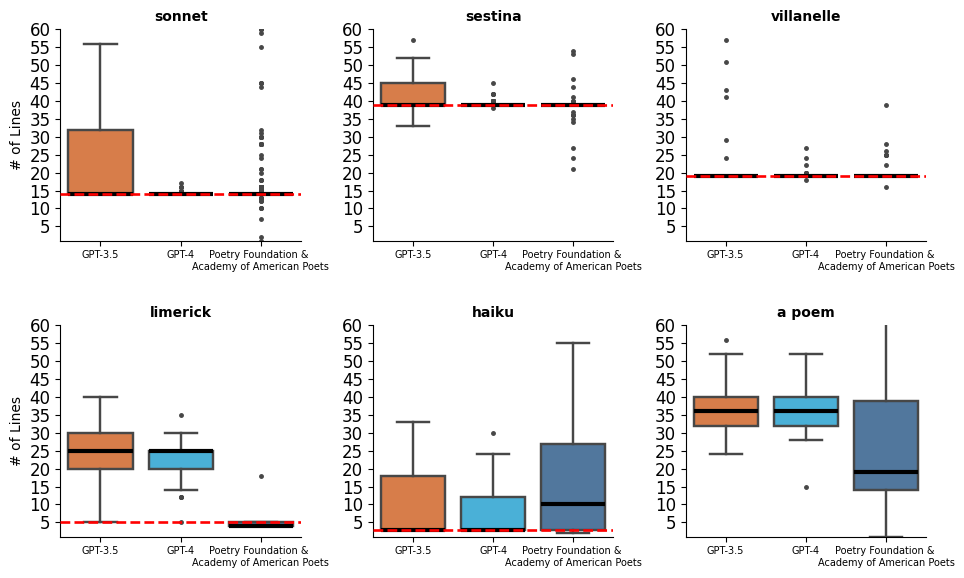

In [341]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

poetry_foundation_data = merged_df[merged_df['model'] == 'Poetry Foundation and Academy of American Poets']

# Create a new DataFrame for "a poem" with all Poetry Foundation data combined
poetry_foundation_combined = poetry_foundation_data.copy()
poetry_foundation_combined['style'] = 'a poem'

# Concatenate the original DataFrame with the new Poetry Foundation combined data
updated_df = pd.concat([merged_df, poetry_foundation_combined])

# Create the box plot
g = sns.catplot(
    data=updated_df, kind="box", col="style",
    aspect=1.2, height=3, linewidth=1.75,
    col_wrap=3, flierprops={"marker": "."},
    medianprops={"color": "black", "linewidth": 3,},
    col_order=['sonnet', 'sestina', 'villanelle', 'limerick', 'haiku', 'a poem'],  # Add 'a poem' to the plot
    x="model", y="num_lines",
    palette=sns.color_palette([
        "#EE7733", "#33BBEE", "#4477AA", "#AA3377", "#009988", "#EE3377"
    ], 5),
    sharey=False,
)

# Set yticks
g.set(yticks=np.arange(0, 62, 5))

# Set titles
g.set_titles("{col_name}", weight='bold', fontsize=20)

g.set(ylim=(1, 60))

plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Draw horizontal lines
line_positions = {
    'sonnet': 14,  
    'limerick': 5,
    'sestina': 39,
    'villanelle': 19,
    'haiku': 3
}

for i, ax in enumerate(g.axes.flatten()):
    style = ax.get_title()

    if style in line_positions:
        ax.axhline(y=line_positions[style], color='red', linestyle='--', lw=1.90, zorder=20)

    # Customize tick labels
    ax.tick_params(labelbottom=True)
    ax.tick_params(labelsize=12)
    ax.set_xticklabels(['GPT-3.5', 'GPT-4', 'Poetry Foundation & \nAcademy of American Poets'], rotation=0, fontsize=7)

    ax.set_xlabel('')

    if i % 3 == 0:  # Add y-axis label only for the leftmost plot
        ax.set_ylabel('# of Lines')
    else:
        ax.set_ylabel('')

# Save the plot
plt.savefig('fixed-avg-line-length-models-and-human-box-plots.png', dpi=300)
